In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
import lightgbm as lgb
from scipy import stats

In [1015]:
data=pd.read_csv("C:\\Users\\nikitasharma\\Desktop\\ml training\\house-prices-advanced-regression-techniques\\train.csv")
test=pd.read_csv('C:\\Users\\nikitasharma\\Desktop\\ml training\\house-prices-advanced-regression-techniques\\test.csv')

In [1016]:
data1=data.copy(deep=True)

In [1017]:

columns=data.columns
columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1018]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1019]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1020]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


{160, 70, 40, 75, 45, 80, 50, 20, 85, 180, 30, 120, 90, 60, 190}


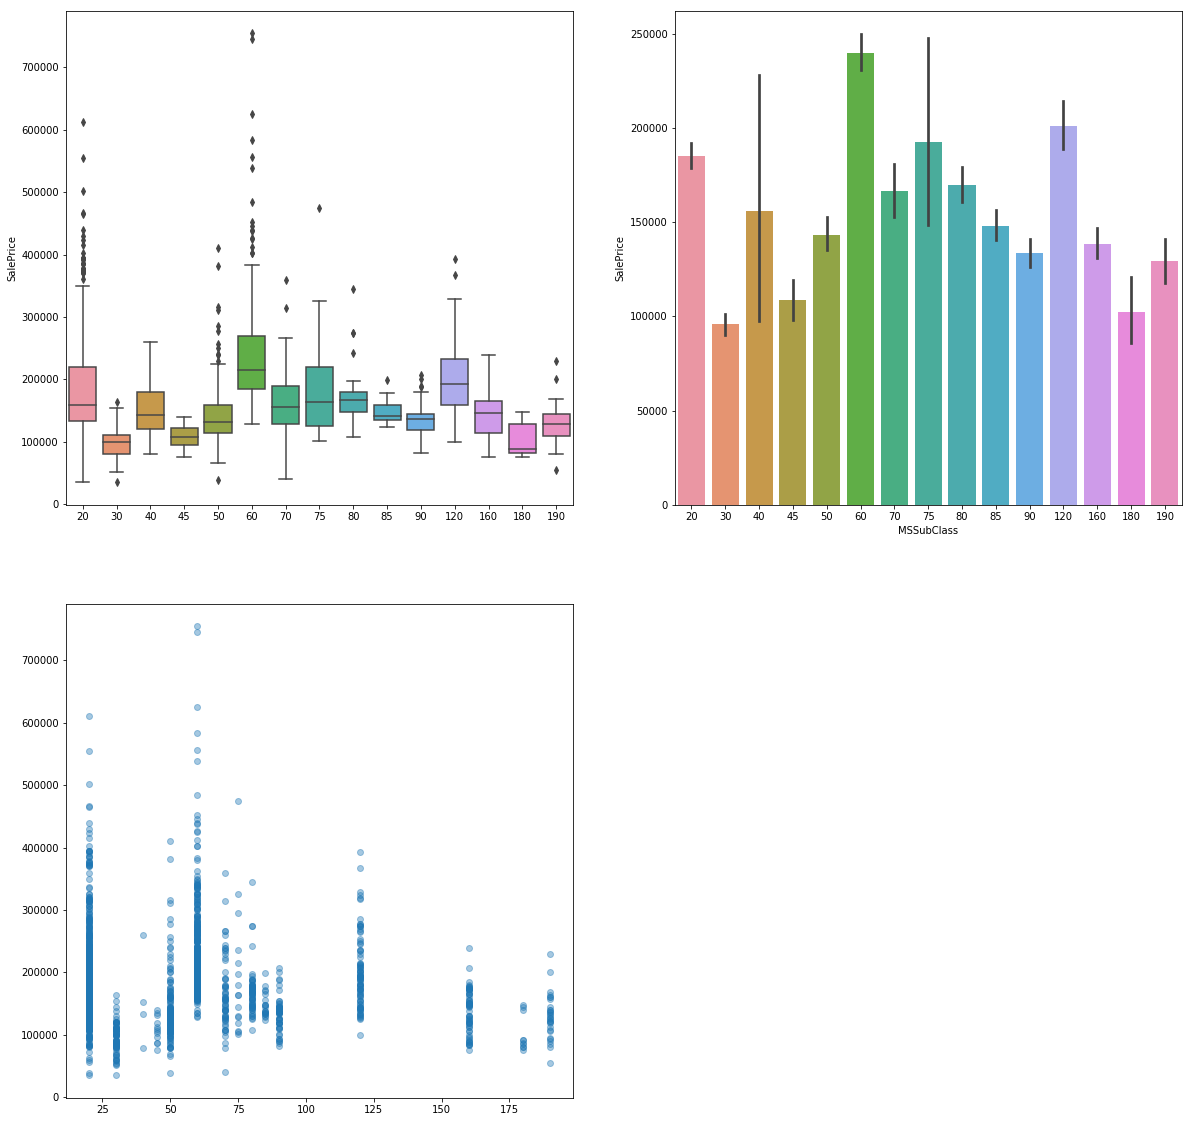

In [1021]:
#visualized same MSSubclass i.e. the class of the house using different plots
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3=fig.add_subplot(223)
print(set(data['MSSubClass']))
sns.boxplot(data['MSSubClass'].values,data['SalePrice'],fliersize=5,ax=ax1)
axis=sns.barplot(data['MSSubClass'],data['SalePrice'],ax=ax2)
plt.scatter(data['MSSubClass'],data['SalePrice'],alpha=.4)



In [1022]:
data.corr().iloc[:,-1]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

# Check for features having positive correlation more than .5 or aprox .5
#1)OverallQual      0.790982
#2)YearBuilt        0.522897
#3)YearRemodAdd     0.507101
#4)TotalBsmtSF      0.613581
#5)1stFlrSF         0.605852
#6)GrLivArea        0.708624
#7)FullBath         0.560664
#8)TotRmsAbvGrd     0.533723
#9)GarageCars       0.640409
#10)GarageArea      0.623431
#11)GarageYrBlt     0.486362

Also 2 features with mild negative corelation-:
#EnclosedPorch   -0.128578
#KitchenAbvGr    -0.135907

Text(0, 0.5, 'correlation wrt to our target SalesPrice')

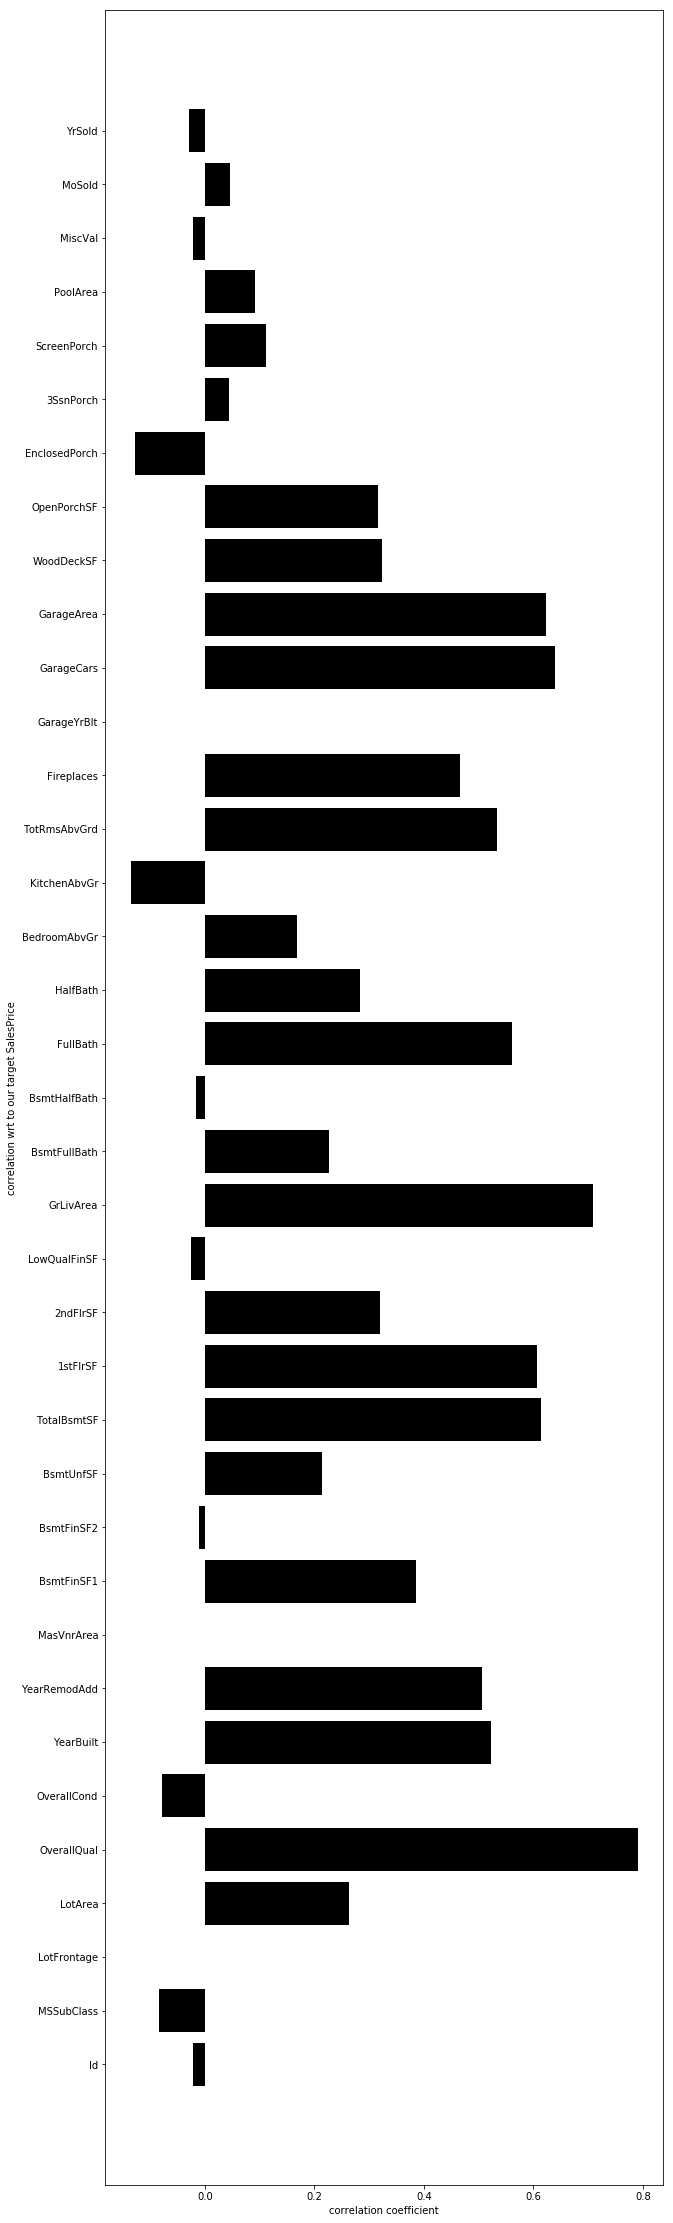

In [1023]:
#first of observing the correlation of numeric or continous features with Y_predict 
#preparing parameters for matplotlib horizontal bar graph.
feat=data.columns[data.dtypes!=object]   #---note down
feat=feat[0:-1]      #--excluding sales price
values=[]   #will have correlation with the price 
labels=[]   #will be a list of column names
for column in feat:
    labels.append(column)
    values.append(np.corrcoef(data[column], data.SalePrice.values)[0,1])
ind=np.arange(len(labels))     
fig , ax= plt.subplots(figsize=(10,40))
ax.barh(ind, np.array(values), color='black') #---parameters are: sequence of positions of each bar, list of value for each hor_bar
ax.set_yticks(ind)             #--giving the list of locations of each bar(manages the accomodation of each label)
ax.set_yticklabels(labels,rotation='horizontal') 
ax.set_xlabel("correlation coefficient")
ax.set_ylabel("correlation wrt to our target SalesPrice")


In [1024]:
#rough practice
print(labels)
print(np.arange(len(labels)))
np.corrcoef(data[feat[1]].values, data.SalePrice.values)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


array([[ 1.        , -0.08428414],
       [-0.08428414,  1.        ]])

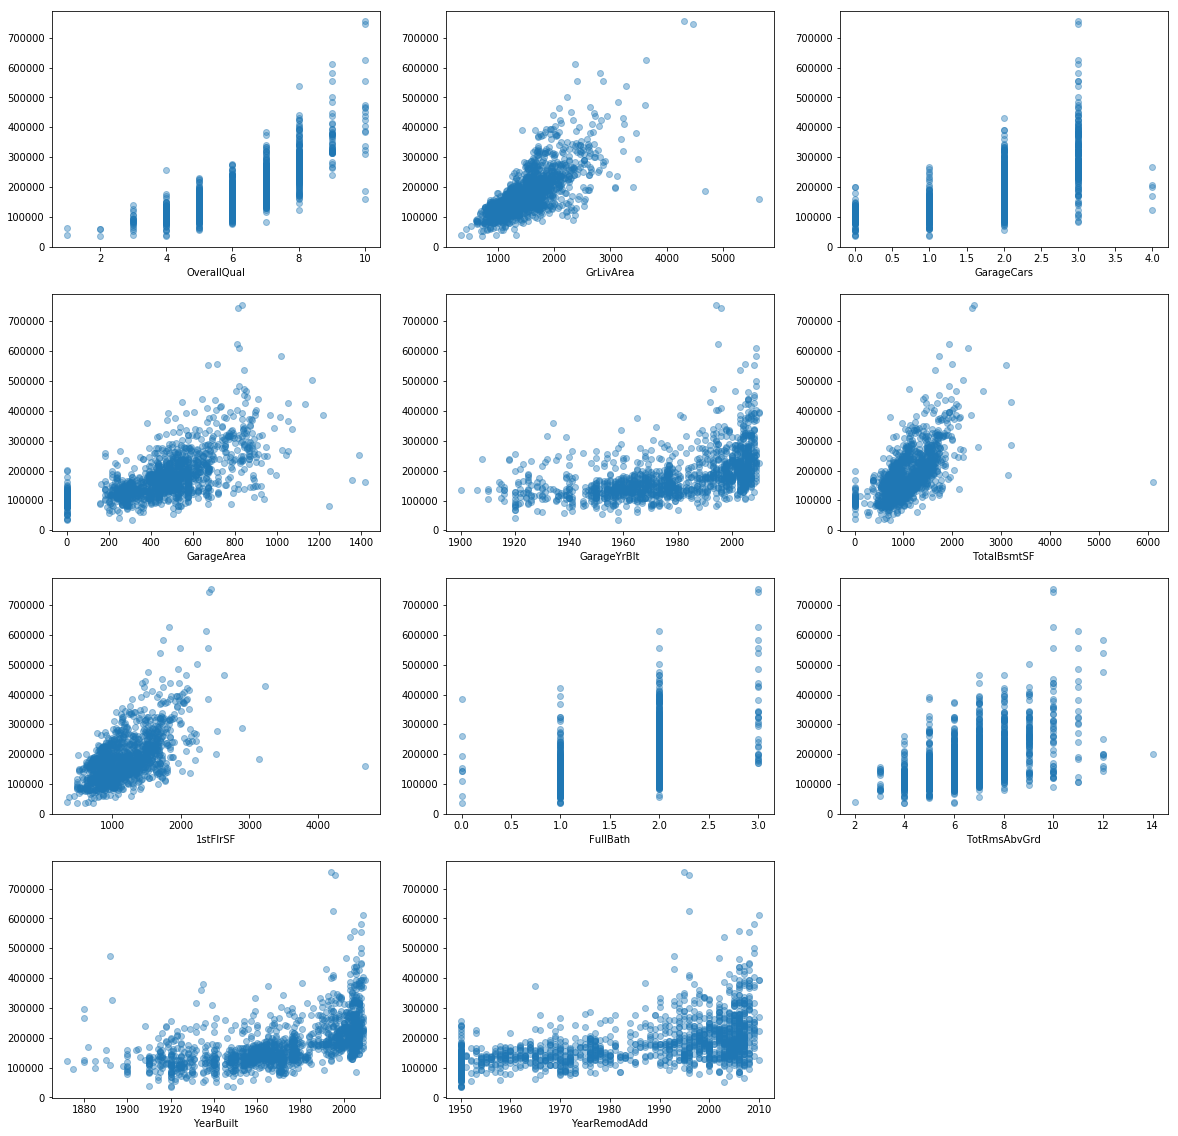

In [1025]:
best_corelated_features=["OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]
fig = plt.figure(figsize=(20,20))
pos=0
for col in best_corelated_features:
    pos=pos+1
    ax=fig.add_subplot(4,3,pos)
    plt.scatter(data[col],data['SalePrice'],alpha=.4)
    plt.xlabel(col)
    

# Multcolinearity
lets see if the features those we have identified as important, if they are multicolinear using heatMap

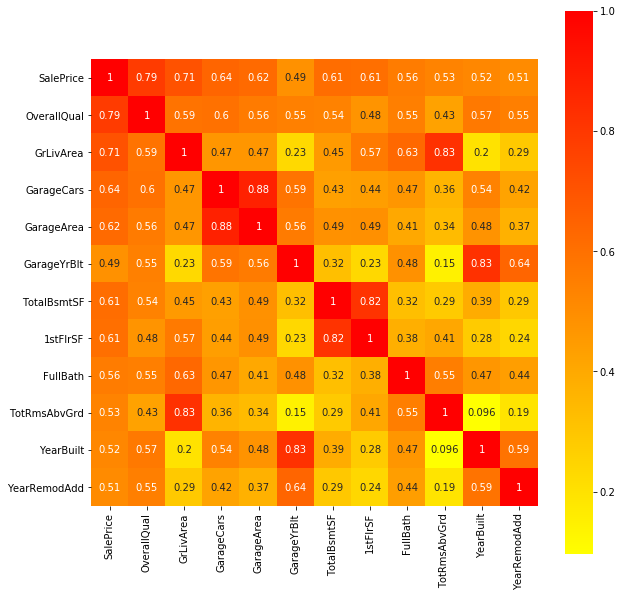

In [1026]:
coMat=data[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(coMat,annot=True,linecolor='violet',square=True,cmap='autumn_r')   
#--annot: if true values will be written on each box ,linecolor-color of each square border

In [1027]:
del data['GarageYrBlt']
del test['GarageYrBlt']

# correlated features:
#GrLivArea and TotRmsAbvGrd
#GarageCars and GarageArea
#GarageYrBlt and YearBuilt
#TotalBsmtSF and 1stFlrSF
#->can use PCA
#->can make 1 feature out of them each


In [1028]:
del best_corelated_features[4]

In [1029]:
best_corelated_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

# Observing our target's behaviour

Text(0, 0.5, 'density')

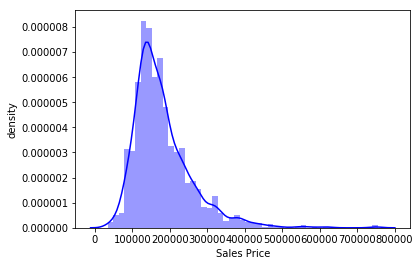

In [1030]:
sns.distplot(data["SalePrice"], color='blue') #--kde if true willshow the normal distribution curve aproximated for hist
plt.xlabel("Sales Price")
plt.ylabel("density")

Graph shows that our target is right skewed

In [1031]:
data.SalePrice.skew() #positive means right skewed

1.8828757597682129

In [1032]:
data.SalePrice.kurt()  #kurtosis basically helps to spot the outliers
#It tells us the extent to which the distribution is more or less outlier-prone (heavier or light-tailed) 
#than the normal distribution. More tapered means more kurtosis.kurtosis depends on the tails. if the tails are sharp then 
#our dataset is having more kurtosis

6.536281860064529

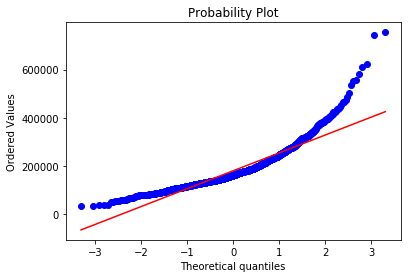

In [1033]:
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

In [1034]:
Y4 = np.log1p(data["SalePrice"])


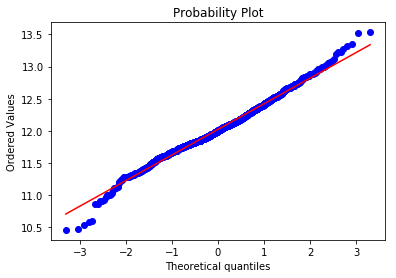

In [1035]:
fig = plt.figure()
res = stats.probplot(Y4, plot=plt)
plt.show()

In [1036]:
Y4.skew()

0.12134661989685333

In [1037]:
Y4.kurt()  

0.809519155707878

# Observing the outliers


In [1038]:
upperlimit=np.percentile(data.SalePrice, 99) #computes the nth, here 99 percentile of Salesprice
print(data[(data['SalePrice']>upperlimit)].iloc[:,1:].Neighborhood)
data[(data['SalePrice']>upperlimit)].iloc[:,1:]

178     StoneBr
185     OldTown
440     NridgHt
527     NridgHt
591     NridgHt
691     NoRidge
769     StoneBr
798     NridgHt
803     NridgHt
898     NridgHt
1046    StoneBr
1169    NoRidge
1182    NoRidge
1243    NridgHt
1373    NoRidge
Name: Neighborhood, dtype: object


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
185,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
440,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
527,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
591,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
798,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
803,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657


#After observing the outliers we are sure that it is not due to error or fraudulant enteries but the price is high because of
the features like 
#overallQuality being highest as 9 and 10 and KitchenQual as good or excellent
#the MSZoning being the residential area with low density which can be costly
#Utilities being all available in the property
#Street is paved
#pool presence
#leveled LandCounter
So we decide to leave the outliers as it is

If outliers were due to an error we could eliminate them by-
#replacing the outlier values by keeping a threshold of 99 percentile
upperlimit=np.percentile(data.SalePrice, 99) #computes the nth, here 99 percentile of Salesprice

data['SalePrice'].ix[data['SalePrice']>upperlimit] = upperlimit

plt.scatter(np.arange(len(data.SalePrice)),data['SalePrice'],c='red',alpha=0.4)

plt.xlabel("DataPoints")

plt.ylabel("SalePrice")

In [1039]:
print("count of null values in columns if any")
d={}
for col in data.columns:
    if data[col].isnull().sum()>0:
        d[col]=data[col].isnull().sum()
print(d.keys())
d

count of null values in columns if any
dict_keys(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'])


{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

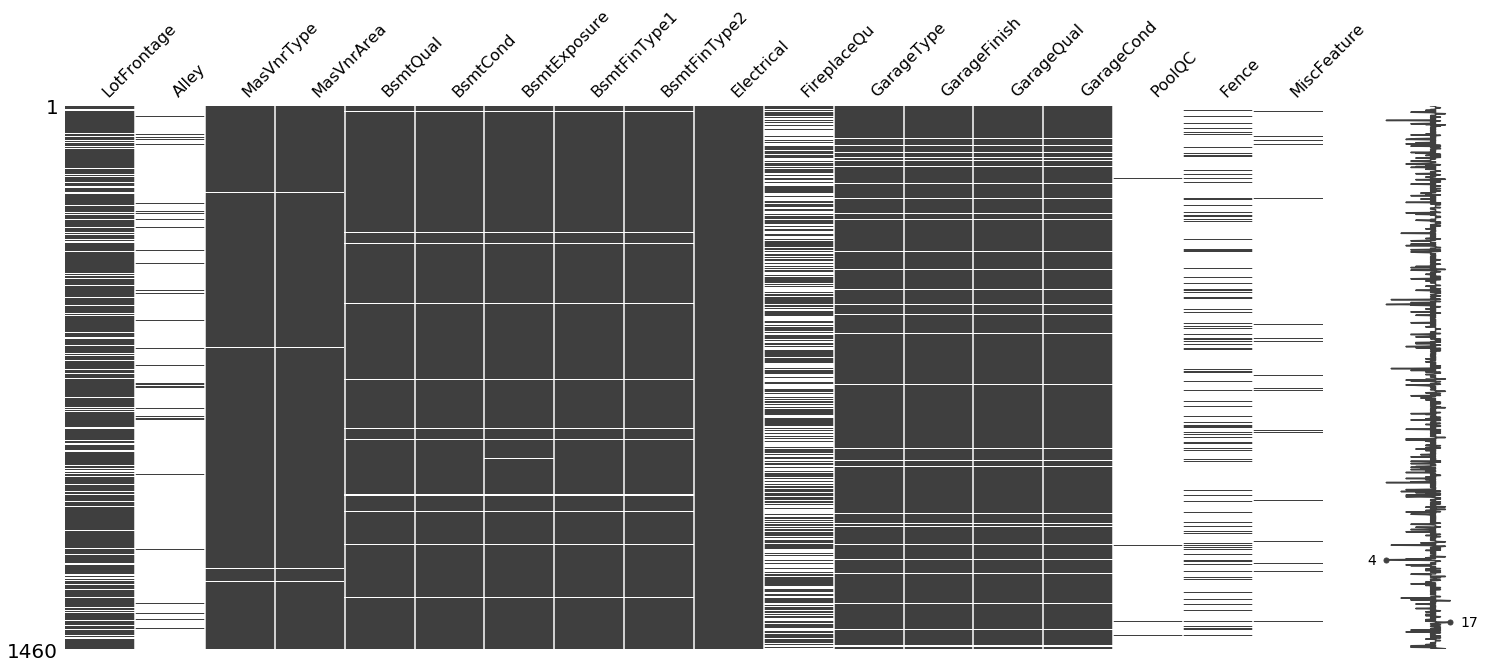

In [1040]:
ms.matrix(data[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']])

In [ ]:
set(data["MiscVal"])
data[~(data["MiscFeature"].isnull())]

# Find out how can we fill these missing points by finding any relationship between these columns and columns without any na

In [1042]:
# for  filling LotFrontage we can consider LotArea 
data['LotFrontage'].corr(data['LotArea'])
#not that good so we shall try polynomials of lotarea

0.42609501877180816

In [1043]:
data['SqrtLotArea']=np.sqrt(data['LotArea'])
data['SqLotArea']=np.square(data['LotArea'])
data['CbrtLotArea']=np.cbrt(data['LotArea'])
print(data['LotFrontage'].corr(data['SqrtLotArea']))
print(data['LotFrontage'].corr(data['SqLotArea']))
print(data['LotFrontage'].corr(data['CbrtLotArea']))
#cbrt has highest correlation with Lotfrontage so we will use it

0.6020022167939364
0.15327157437557445
0.6319836959310066


In [1044]:
test['CbrtLotArea']=np.cbrt(test['LotArea'])
del data['SqrtLotArea']
del data['SqLotArea']

In [1045]:
select_rows=data['LotFrontage'].isnull()
data.LotFrontage[select_rows]=data.CbrtLotArea[select_rows]
select_rows=test['LotFrontage'].isnull()
test.LotFrontage[select_rows]=test.CbrtLotArea[select_rows]

C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Sales Price')

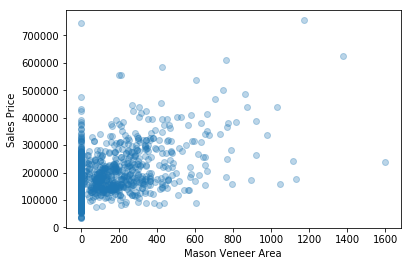

In [1046]:
# As 'MasVnrType' and 'MasVnrArea' have 8 null vallues at same position lets observe them
plt.scatter(data.MasVnrArea,data.SalePrice,alpha=.3)
plt.xlabel("Mason Veneer Area")
plt.ylabel("Sales Price")

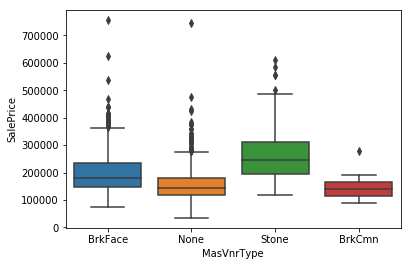

In [1047]:
sns.boxplot('MasVnrType','SalePrice',data=data)

In [1048]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

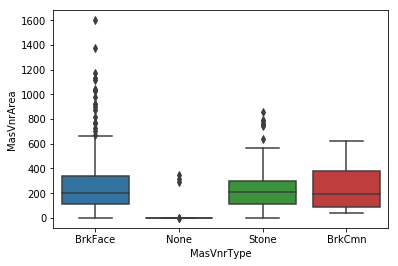

In [1049]:
sns.boxplot('MasVnrType','MasVnrArea',data=data)

Here we can see that though the there are some points where there is 'none' masonry veener type  there's some area for those pts lets observe that

In [1050]:
data[data["MasVnrType"]=='None'].MasVnrArea.value_counts()


0.0      859
1.0        2
312.0      1
344.0      1
288.0      1
Name: MasVnrArea, dtype: int64

In [1051]:
test[test["MasVnrType"]=='None'].MasVnrArea.value_counts()

0.0      876
285.0      1
1.0        1
Name: MasVnrArea, dtype: int64

In [1052]:
#Its possible that someone has forgotten to put the masonory type in 3 rows rest for area 1.0 those 2 are errors
print(data[(data["MasVnrType"]=='None')&(data.MasVnrArea==1.0)].MasVnrArea)
print(test[(test["MasVnrType"]=='None')&(test.MasVnrArea==1.0)].MasVnrArea)


773     1.0
1230    1.0
Name: MasVnrArea, dtype: float64
992    1.0
Name: MasVnrArea, dtype: float64


In [1053]:
data["MasVnrArea"].replace(data[(data["MasVnrType"]=='None')&(data.MasVnrArea==1.0)].MasVnrArea,0.0,inplace=True)
test["MasVnrArea"].replace(test[(test["MasVnrType"]=='None')&(test.MasVnrArea==1.0)].MasVnrArea,0.0,inplace=True)

In [1054]:
data[data["MasVnrType"]=='None'].MasVnrArea.value_counts()

0.0      861
312.0      1
344.0      1
288.0      1
Name: MasVnrArea, dtype: int64

In [1055]:
test[test["MasVnrType"]=='None'].MasVnrArea.value_counts()

0.0      877
285.0      1
Name: MasVnrArea, dtype: int64

In [1056]:
#shall i make a new class of none?
#YES
data.MasVnrArea.fillna(0,inplace=True)
data.MasVnrType.fillna("None",inplace=True)
test.MasVnrArea.fillna(0,inplace=True)
test.MasVnrType.fillna("None",inplace=True)


In [1057]:
data[data["MasVnrType"]=='None'].MasVnrArea.value_counts()

0.0      869
312.0      1
344.0      1
288.0      1
Name: MasVnrArea, dtype: int64

#We shall make them Nans in type columns,so that we can handle them afterwards

In [1058]:
data["MasVnrType"].replace(data[(data["MasVnrType"]=='None')&(data.MasVnrArea!=0.0)].MasVnrType,np.nan,inplace=True)
test["MasVnrType"].replace(test[(test["MasVnrType"]=='None')&(test.MasVnrArea!=0.0)].MasVnrType,np.nan,inplace=True)


In [1059]:
test["MasVnrType"].isnull().sum()

2

In [1060]:
test[test["MasVnrType"].isnull()].MasVnrArea

209     285.0
1150    198.0
Name: MasVnrArea, dtype: float64

In [1061]:
#now handle the basement variables missing numbers

In [1062]:
values = {'BsmtCond': 'no_Bsmt','BsmtQual':'no_Bsmt', 'BsmtExposure': 'no_Bsmt', 'BsmtFinType1': 'no_Bsmt', 'BsmtFinType2': 'no_Bsmt'}
data.fillna(value=values,inplace=True)

In [1063]:
test.fillna(value=values,inplace=True)

In [1064]:
values={'TotalBsmtSF':0,'BsmtUnfSF':0,'BsmtFinSF2':0,'BsmtFinSF1':0}
test.fillna(value=values,inplace=True)

In [1065]:
data[data['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CbrtLotArea
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,167500,21.352332


In [1066]:
test[test['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CbrtLotArea


In [1067]:
for col in data.columns:
    print(col,": ",data[data['Electrical'].isnull()][col].values)

Id :  [1380]
MSSubClass :  [80]
MSZoning :  ['RL']
LotFrontage :  [73.]
LotArea :  [9735]
Street :  ['Pave']
Alley :  [nan]
LotShape :  ['Reg']
LandContour :  ['Lvl']
Utilities :  ['AllPub']
LotConfig :  ['Inside']
LandSlope :  ['Gtl']
Neighborhood :  ['Timber']
Condition1 :  ['Norm']
Condition2 :  ['Norm']
BldgType :  ['1Fam']
HouseStyle :  ['SLvl']
OverallQual :  [5]
OverallCond :  [5]
YearBuilt :  [2006]
YearRemodAdd :  [2007]
RoofStyle :  ['Gable']
RoofMatl :  ['CompShg']
Exterior1st :  ['VinylSd']
Exterior2nd :  ['VinylSd']
MasVnrType :  ['None']
MasVnrArea :  [0.]
ExterQual :  ['TA']
ExterCond :  ['TA']
Foundation :  ['PConc']
BsmtQual :  ['Gd']
BsmtCond :  ['TA']
BsmtExposure :  ['No']
BsmtFinType1 :  ['Unf']
BsmtFinSF1 :  [0]
BsmtFinType2 :  ['Unf']
BsmtFinSF2 :  [0]
BsmtUnfSF :  [384]
TotalBsmtSF :  [384]
Heating :  ['GasA']
HeatingQC :  ['Gd']
CentralAir :  ['Y']
Electrical :  [nan]
1stFlrSF :  [754]
2ndFlrSF :  [640]
LowQualFinSF :  [0]
GrLivArea :  [1394]
BsmtFullBath :  [0

In [1068]:
data[(data['MSZoning']=='RL')&(data.Utilities=='AllPub')&(data.OverallQual==5)].Electrical.value_counts()

SBrkr    285
FuseA     25
FuseF      4
Name: Electrical, dtype: int64

In [1069]:
#we can fill null with SBrkr
data["Electrical"].fillna('SBrkr',inplace=True)

In [1070]:
data["Electrical"].isnull().sum()

0

In [1071]:
#FireplaceQu is null where ever there's no Fire place
set(data[data["FireplaceQu"].isnull()].Fireplaces)

{0}

In [1072]:
data["FireplaceQu"].fillna("No_Fireplace",inplace=True)
test["FireplaceQu"].fillna("No_Fireplace",inplace=True)


C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


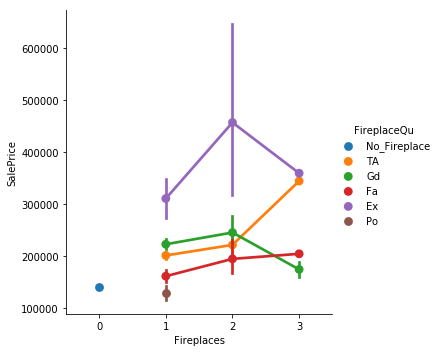

In [1073]:

sns.factorplot("Fireplaces","SalePrice",data=data,hue="FireplaceQu")

In [1074]:
#handling Garage variables

In [1075]:
values={'GarageType':'No_garage', 'GarageFinish':"No_garage", 'GarageQual':"No_garage", 'GarageCond':"No_garage"}
data.fillna(value=values,inplace=True)
test.fillna(value=values,inplace=True)

In [1076]:
values={'GarageCars' :0,
'GarageArea':0}
test.fillna(value=values,inplace=True)

In [1077]:
values={'Alley':'No_Alley','PoolQC':'No_Pool','Fence':'No_Fence'}
data.fillna(value=values,inplace=True)
test.fillna(value=values,inplace=True)

In [1078]:
set(data[data['MiscFeature'].isnull()].MiscVal)

{0}

In [1079]:
values={'MiscFeature':'NoMiscFeature'}
data.fillna(value=values,inplace=True)
test.fillna(value=values,inplace=True)


In [1080]:
#all columns are free of nans except for MasVnrType in which we introduced 3 
for col in data.columns:
    if(data[col].isnull().sum()):
        print(col,": ",data[col].isnull().sum())

MasVnrType :  3


In [1081]:
for col in test.columns:
    if(test[col].isnull().sum()):
        print(col,": ",test[col].isnull().sum())

MSZoning :  4
Utilities :  2
Exterior1st :  1
Exterior2nd :  1
MasVnrType :  2
BsmtFullBath :  2
BsmtHalfBath :  2
KitchenQual :  1
Functional :  2
SaleType :  1


In [1082]:
test['Exterior1st'].mode()

0    VinylSd
dtype: object

In [1083]:
test['Exterior1st'].fillna(value='VinylSd',inplace=True)

In [1084]:
test['BsmtFullBath'].fillna(value=0,inplace=True)
test['BsmtHalfBath'].fillna(value=0,inplace=True)

In [1085]:
print(test[test['KitchenQual'].isnull()].OverallQual)
test[test['KitchenQual'].isnull()]

95    5
Name: OverallQual, dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CbrtLotArea
95,1556,50,RL,72.0,10632,Pave,No_Alley,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,NoMiscFeature,0,1,2010,COD,Normal,21.988975


In [1086]:
test[(test['KitchenAbvGr']==1)&(test.MSZoning=='RL')&(test.OverallQual==5)].KitchenQual.mode()

0    TA
dtype: object

In [1087]:
test['KitchenQual'].fillna('TA',inplace=True)

In [1088]:
test['Functional'].mode()

0    Typ
dtype: object

In [1089]:
test['Functional'].fillna(value='Typ',inplace=True)

In [1090]:
test['SaleType'].mode()

0    WD
dtype: object

In [1091]:
test['SaleType'].fillna(value='WD',inplace=True)

In [1092]:
test[test['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CbrtLotArea
455,1916,30,NaN,109.000000,21780,Grvl,No_Alley,Reg,Lvl,NaN,...,0,No_Pool,No_Fence,NoMiscFeature,0,3,2009,ConLD,Normal,27.926679
756,2217,20,NaN,80.000000,14584,Pave,No_Alley,Reg,Low,AllPub,...,0,No_Pool,No_Fence,NoMiscFeature,0,2,2008,WD,Abnorml,24.431992
790,2251,70,NaN,38.394776,56600,Pave,No_Alley,IR1,Low,AllPub,...,0,No_Pool,No_Fence,NoMiscFeature,0,1,2008,WD,Normal,38.394776
1444,2905,20,NaN,125.000000,31250,Pave,No_Alley,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,NoMiscFeature,0,5,2006,WD,Normal,31.498026


In [1093]:
test[test['MSSubClass']==30].MSZoning.mode()

0    RM
dtype: object

In [1094]:
test['MSZoning'].replace(test[(test['MSSubClass']==30)&(test['MSZoning'].isnull())].MSZoning,'RM',inplace=True)

In [1095]:
test[test['MSSubClass']==20].MSZoning.mode()

0    RL
dtype: object

In [1096]:
test['MSZoning'].replace(test[(test['MSSubClass']==20)&(test['MSZoning'].isnull())].MSZoning,'RL',inplace=True)

In [1097]:
test[test['MSSubClass']==70].MSZoning.mode()

0    RM
dtype: object

In [1098]:
test['MSZoning'].replace(test[(test['MSSubClass']==70)&(test['MSZoning'].isnull())].MSZoning,'RM',inplace=True)

In [1099]:
#impute MasVnrType using fancyimpute's KNN
set(data['MasVnrType'])

{'BrkCmn', 'BrkFace', 'None', 'Stone', nan}

In [1100]:
set(test['MasVnrType'])

{'BrkCmn', 'BrkFace', 'None', 'Stone', nan}

In [1101]:
test['MasVnrType'].value_counts()

None       892
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [1102]:
data['MasVnrType'].value_counts()

None       869
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1103]:
def labeMVT(str):
    if str=='BrkCmn':
        return 1
    elif str=='None':
        return 2
    elif str=='BrkFace':
        return 3
    elif str=='Stone':
        return 4

In [1104]:
data['MasVnrType']=data['MasVnrType'].apply(labeMVT)
test['MasVnrType']=test['MasVnrType'].apply(labeMVT)

In [1105]:
from fancyimpute import KNN

In [1106]:
X_filled_knn = KNN(k=4).fit_transform(data[['MasVnrType', 'MasVnrArea', 'LotArea']])
X_filled_knn1 = KNN(k=4).fit_transform(test[['MasVnrType', 'MasVnrArea', 'LotArea']])

Imputing row 1/1460 with 0 missing, elapsed time: 0.317
Imputing row 101/1460 with 0 missing, elapsed time: 0.318
Imputing row 201/1460 with 0 missing, elapsed time: 0.318
Imputing row 301/1460 with 0 missing, elapsed time: 0.319
Imputing row 401/1460 with 0 missing, elapsed time: 0.319
Imputing row 501/1460 with 0 missing, elapsed time: 0.320
Imputing row 601/1460 with 0 missing, elapsed time: 0.320
Imputing row 701/1460 with 0 missing, elapsed time: 0.321
Imputing row 801/1460 with 0 missing, elapsed time: 0.321
Imputing row 901/1460 with 0 missing, elapsed time: 0.322
Imputing row 1001/1460 with 0 missing, elapsed time: 0.322
Imputing row 1101/1460 with 0 missing, elapsed time: 0.323
Imputing row 1201/1460 with 0 missing, elapsed time: 0.323
Imputing row 1301/1460 with 1 missing, elapsed time: 0.324
Imputing row 1401/1460 with 0 missing, elapsed time: 0.325
Imputing row 1/1459 with 0 missing, elapsed time: 0.310
Imputing row 101/1459 with 0 missing, elapsed time: 0.310
Imputing row 

In [1107]:
X_filled_knn = pd.DataFrame(X_filled_knn, columns =['MasVnrType', 'MasVnrArea', 'LotArea'])
X_filled_knn1 = pd.DataFrame(X_filled_knn1, columns =['MasVnrType', 'MasVnrArea', 'LotArea'])

In [1108]:
data["MasVnrType2"]=np.round(X_filled_knn['MasVnrType'],0)
test["MasVnrType2"]=np.round(X_filled_knn1['MasVnrType'],0)

In [1109]:
data[data["MasVnrType"].isnull()][['MasVnrType', 'MasVnrArea', 'LotArea',"MasVnrType2"]]

,MasVnrType,MasVnrArea,LotArea,MasVnrType2
624,NaN,288.0,10400,3.0
1300,NaN,344.0,10762,3.0
1334,NaN,312.0,2368,3.0


In [1110]:
test[test["MasVnrType"].isnull()][['MasVnrType', 'MasVnrArea', 'LotArea',"MasVnrType2"]]

,MasVnrType,MasVnrArea,LotArea,MasVnrType2
209,NaN,285.0,13514,3.0
1150,NaN,198.0,27697,2.0


In [1111]:
del data["MasVnrType"]
del data["Id"]
del test["MasVnrType"]
del test["Id"]

In [1112]:
feat2=data.columns[data.dtypes==object]
print(len(feat2))
feat2


42


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

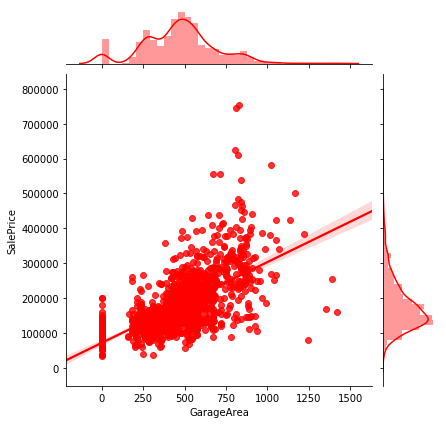

In [1113]:
sns.jointplot(data["GarageArea"],data["SalePrice"],kind='regres',color='red')

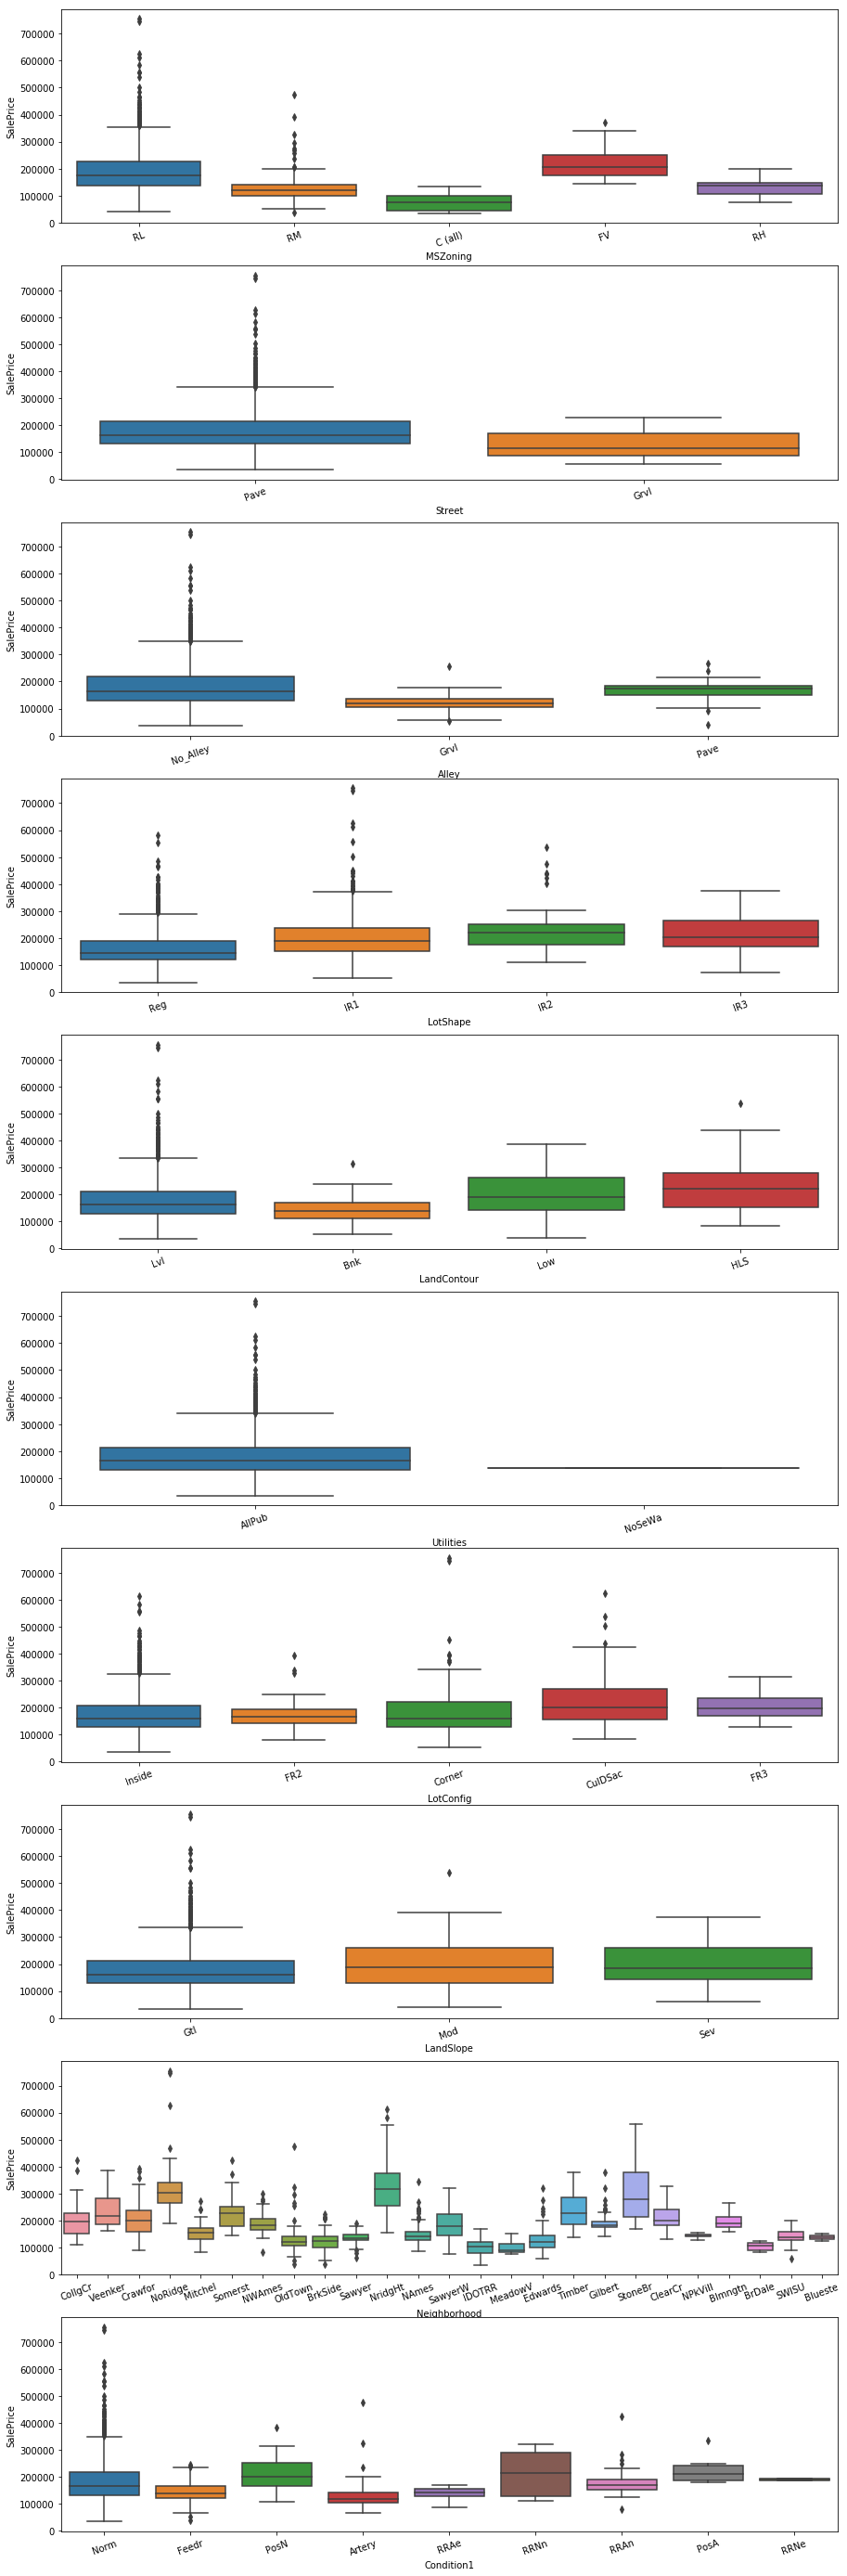

In [1114]:
feat2=data.columns[data.dtypes==object]
feat3=feat2[:10]
fig = plt.figure(figsize=(15,50),edgecolor='red')
pos=0
for col in feat3:
    pos=pos+1
    ax1=fig.add_subplot(10,1,pos,projection=None)
    sns.boxplot(data[col],data['SalePrice'],ax=ax1)
    plt.xlabel(col)
    plt.xticks(rotation=20)
    

In [1115]:
print(data.MSZoning.value_counts())
list_for_dummies=list()
list_for_dummies=list_for_dummies+["MSZoning"]

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


In [1116]:
#get rid of this
print(data.Street.value_counts())
del data['Street']
del test['Street']

Pave    1454
Grvl       6
Name: Street, dtype: int64


In [1117]:
# weightage 0 1 2
print(data.Alley.value_counts())

No_Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64


In [1118]:
def labelAlley(str):
    if str=='No_Alley':
        return 0
    elif str=='Grvl':
        return 1
    else:
        return 2
data["Alley"]=data["Alley"].apply(labelAlley)    

In [1119]:
test["Alley"]=test["Alley"].apply(labelAlley)    

In [1120]:
#considering LotShape coz in the outliers it was ither regular or slightly irregular-IR1
#will do one hot encoding of this
data.LotShape.value_counts()


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [1121]:
list_for_dummies=list_for_dummies+["LotShape"]

In [1122]:
print(list_for_dummies)

['MSZoning', 'LotShape']


In [1123]:
#theres not much information as most of the rows are leveled

print(data.LandContour.value_counts())
del data["LandContour"]

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


In [1124]:
del test["LandContour"]

In [1125]:
#its better to get rid of this
print(data.Utilities.value_counts())
del data["Utilities"]
del test["Utilities"]

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [1126]:
#though distribution of the values is not that satisfactory but we can hit and trial this feature
print(data.LotConfig.value_counts())
list_for_dummies=list_for_dummies+["LotConfig"]
#will check accuracy after and before adding its dummies

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


In [1127]:
#can give weightage as 2, 1, 0 as the houses with highest saleprice has gentle slope
   
data.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [1128]:
def labelLandSlope(str):
    if str=='Gtl':
        return 2
    elif str=='Mod':
        return 1
    else:
        return 0
data["LandSlope"]=data["LandSlope"].apply(labelLandSlope) 
test["LandSlope"]=test["LandSlope"].apply(labelLandSlope) 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


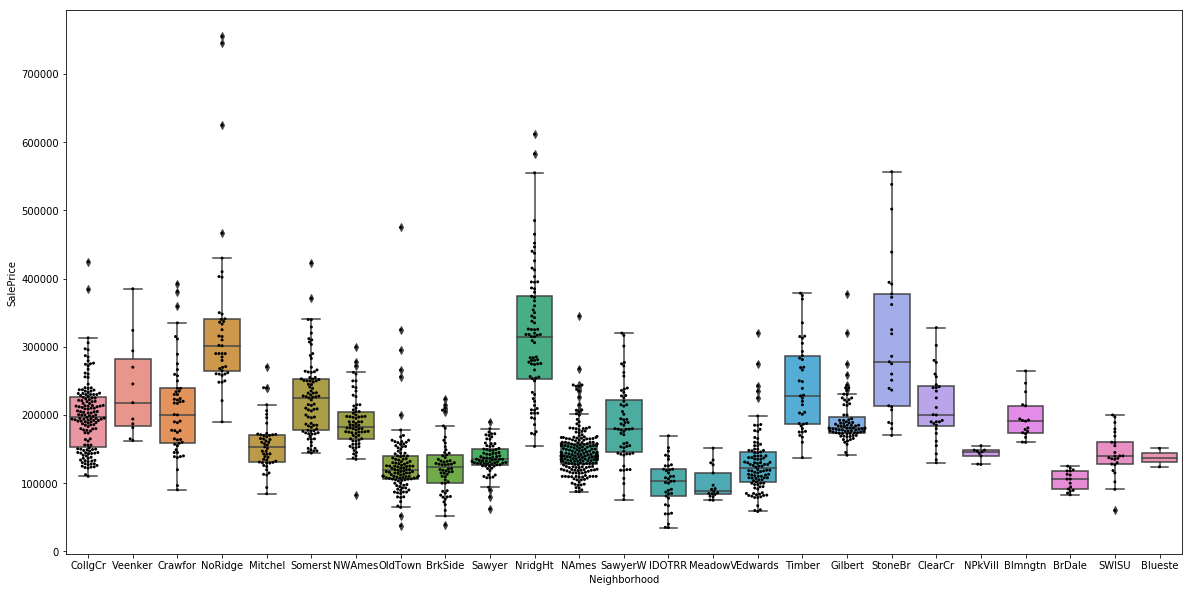

In [1129]:
print(data.Neighborhood.value_counts())
fig = plt.figure(figsize=(20,10),edgecolor='red')
ax3=sns.boxplot(data['Neighborhood'],data['SalePrice'])
sns.swarmplot(data['Neighborhood'],data['SalePrice'],color='black',size=3)
#some of the categories has value counts as low as 2.We dont want to make feature which has only 2 true values in the end when we
#onehot encod them therefore we will group the categories lower than 40 as 'others1' and 'others2' based on the 1stFlrSF
#not on the basis of saleprice coz it is our target 


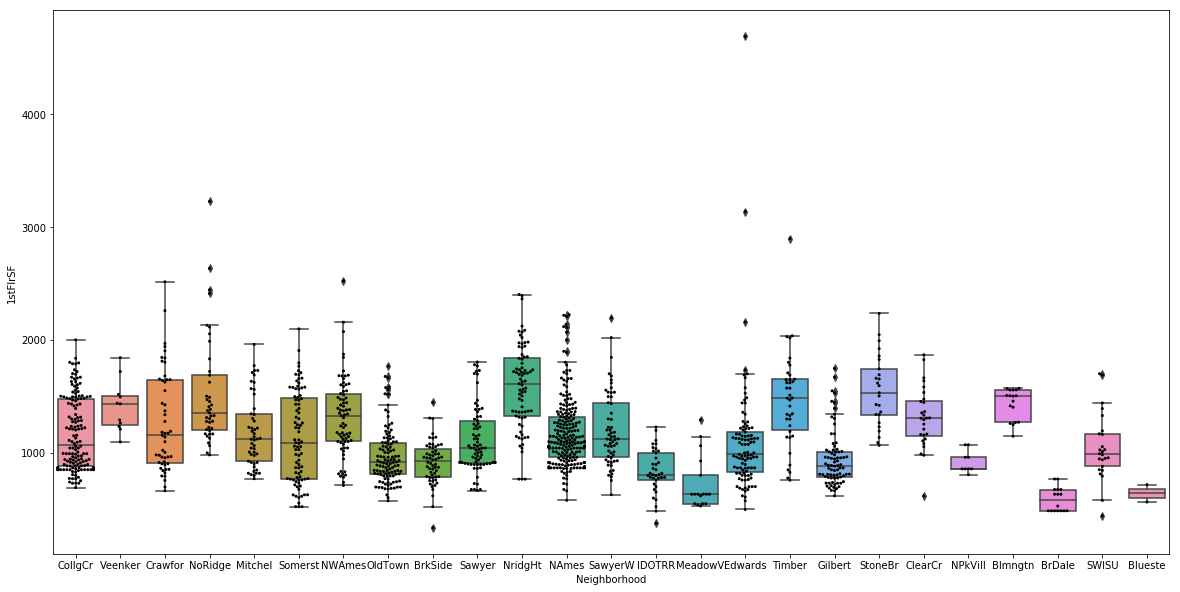

In [1130]:
fig = plt.figure(figsize=(20,10),edgecolor='red')
sns.boxplot(data['Neighborhood'],data['1stFlrSF'])
sns.swarmplot(data['Neighborhood'],data['1stFlrSF'],color='black',size=3)

In [1131]:
#finding the SalePrice on which we want to split 2 categories 
split_Y_point=0.0
c=0
for cat in set(data["Neighborhood"]):
    no_of_rows=len(data[(data['Neighborhood']==cat)].Neighborhood)
    if(no_of_rows<50):
        c=c+1
        split_Y_point=split_Y_point+(data[(data['Neighborhood']==cat)]['SalePrice'].mean())
        
split_Y_point=split_Y_point/c
split_Y_point

185884.67183877935

In [1132]:
#rough
len(data[(data['Neighborhood']=='CollgCr')].Neighborhood)
data[(data['Neighborhood']=='CollgCr')]['SalePrice'].mean()

197965.77333333335

In [1133]:
for cat in set(data["Neighborhood"]):
    selected_rows=data[(data['Neighborhood']==cat)].Neighborhood
    no_of_rows=len(data[(data['Neighborhood']==cat)].Neighborhood)
    Sale=data[(data['Neighborhood']==cat)]['SalePrice'].mean()
    if(no_of_rows<50):
        if(Sale<=split_Y_point):
            data["Neighborhood"].replace(cat,'others1',inplace=True)
            test["Neighborhood"].replace(cat,'others1',inplace=True)
        else:
            data["Neighborhood"].replace(cat,'others2',inplace=True)
            test["Neighborhood"].replace(cat,'others2',inplace=True)

In [1134]:
list_for_dummies=list_for_dummies+["Neighborhood"]


In [1135]:
#not helpful

print(data["Condition1"].value_counts())
del data["Condition1"]
del test["Condition1"]

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


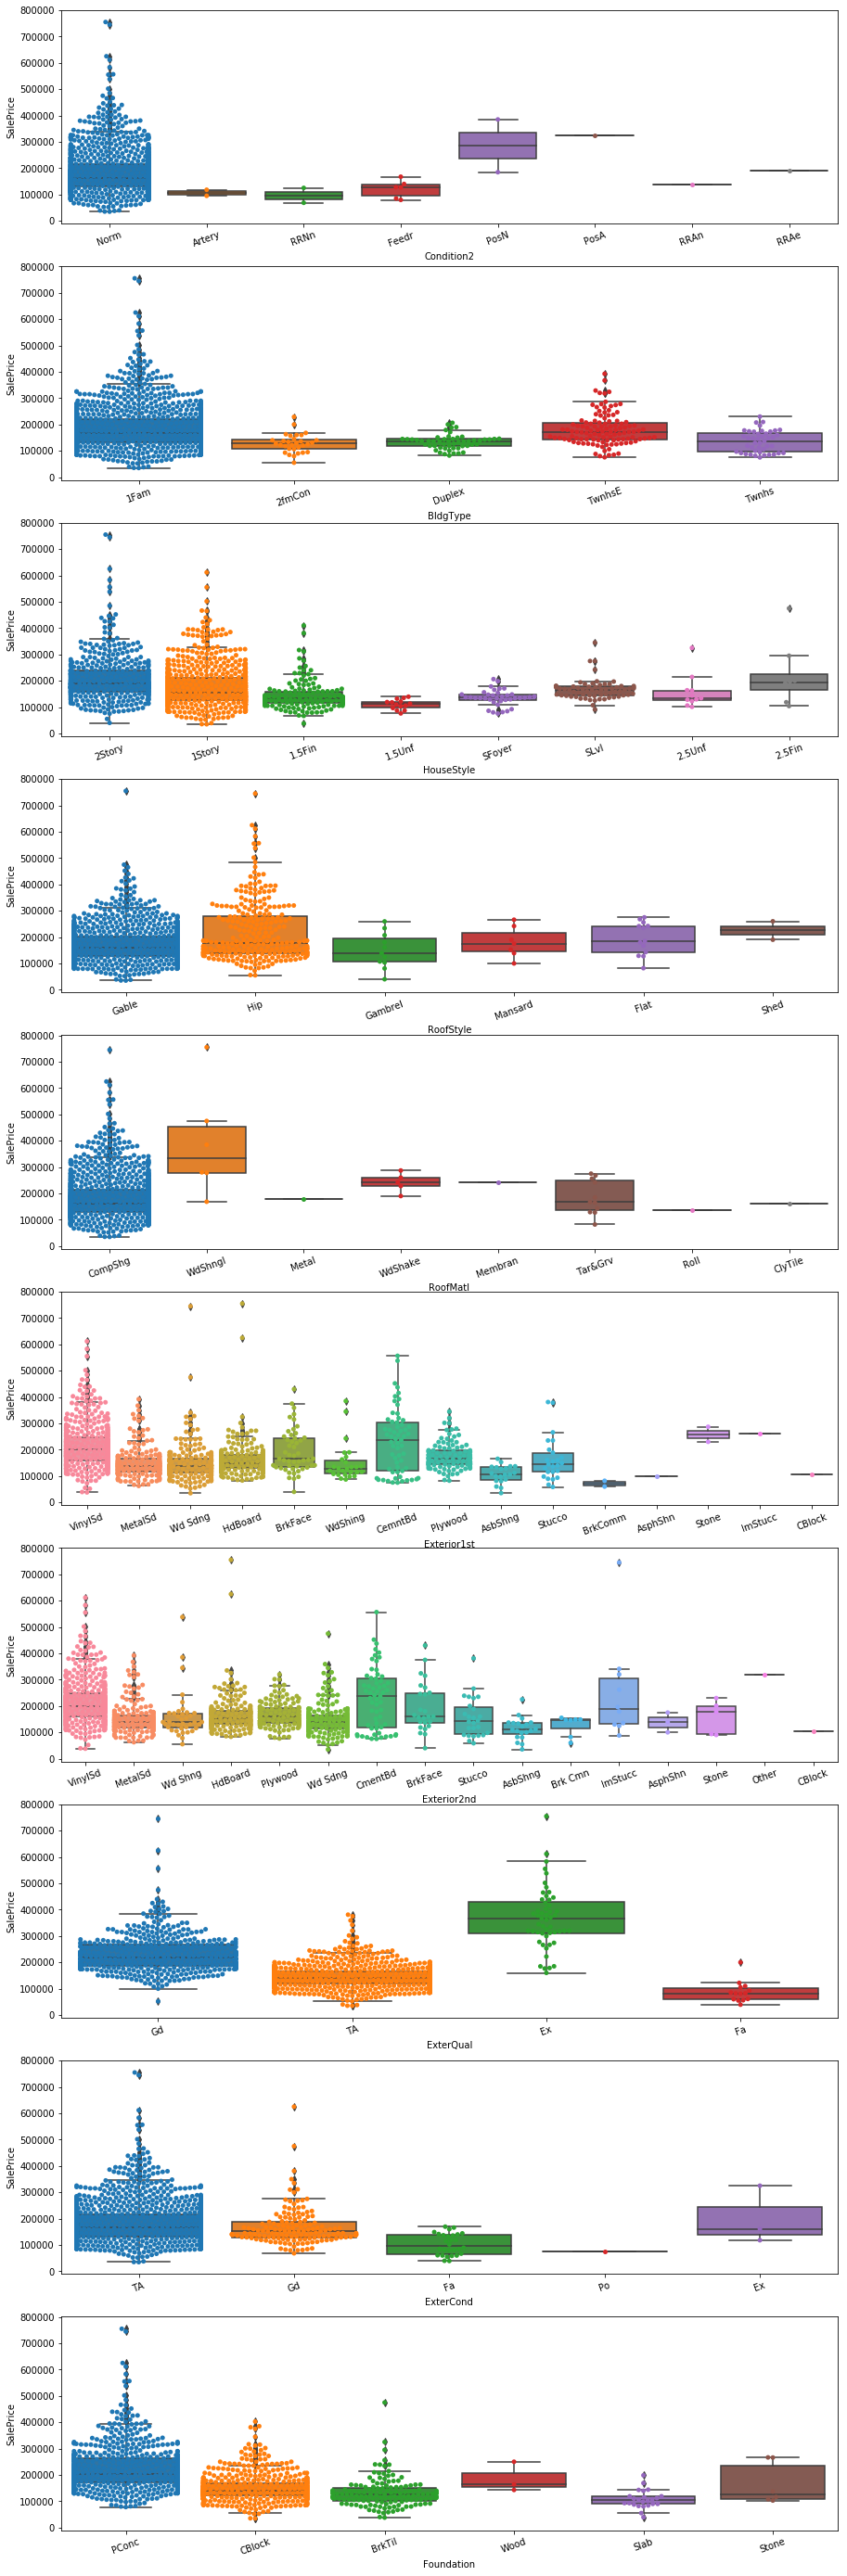

In [1136]:
feat3=feat2[10:20]
fig = plt.figure(figsize=(15,50),edgecolor='red')
pos=0
for col in feat3:
    pos=pos+1
    ax1=fig.add_subplot(10,1,pos,projection=None)
    sns.boxplot(data[col],data['SalePrice'],ax=ax1)
    sns.swarmplot(data[col],data['SalePrice'],ax=ax1)
    plt.xlabel(col)
    plt.xticks(rotation=20)
    

In [1137]:
print(data["Condition2"].value_counts())
del data["Condition2"]
del test["Condition2"]

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64


In [1138]:
#maybe usefull

data["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [1139]:
list_for_dummies=list_for_dummies+["BldgType"]


In [1140]:
#failrly distributed except for the fact we will group 1.5Unf,2.5Unf,2.5Fin as others
data["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [1141]:
data["HouseStyle"].replace(['1.5Unf','2.5Unf','2.5Fin'],'others',inplace=True)
test["HouseStyle"].replace(['1.5Unf','2.5Unf','2.5Fin'],'others',inplace=True)

In [1142]:
list_for_dummies=list_for_dummies+["HouseStyle"]

In [1143]:
#maybe useful check by hit and trial
data["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [1144]:
data["RoofStyle"].replace(['Flat','Gambrel','Mansard','Shed'],'others',inplace=True)
test["RoofStyle"].replace(['Flat','Gambrel','Mansard','Shed'],'others',inplace=True)

In [1145]:
list_for_dummies=list_for_dummies+["RoofStyle"]

In [1146]:
#get rid of this
print(data["RoofMatl"].value_counts())
del data["RoofMatl"]
del test["RoofMatl"]

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Roll          1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64


In [1147]:
#group less than 50 as others
data["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [1148]:
data["Exterior1st"].replace(['WdShing','Stucco','AsbShng','Stone','BrkComm','AsphShn','ImStucc','CBlock'],'others',inplace=True)
test["Exterior1st"].replace(['WdShing','Stucco','AsbShng','Stone','BrkComm','AsphShn','ImStucc','CBlock'],'others',inplace=True)

In [1149]:
list_for_dummies=list_for_dummies+["Exterior1st"]

In [1150]:
#we shall keep one of them as they are almost delivering the same info
print(data["Exterior2nd"].value_counts())
del data["Exterior2nd"]
del test["Exterior2nd"]

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64


In [1151]:
#give weightage as ex as 4,gd as 3,TA as 2,Fa as 1
data["ExterQual"].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [1152]:
def labelexq(str):
    if str=='Ex':
        return 4
    elif str=='Gd':
        return 3
    elif str=='TA':
        return 2
    else:
        return 1
data["ExterQual"]=data["ExterQual"].apply(labelexq)    
test["ExterQual"]=test["ExterQual"].apply(labelexq)    

In [1153]:
#give weightage as ex as 5,gd as 4,TA as 3,Fa as 2, Po as 1
data["ExterCond"].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [1154]:
def labelexc(str):
    if str=='Ex':
        return 4
    elif str=='Gd':
        return 3
    elif str=='TA':
        return 2
    elif str=='Fa':
        return 1
    else:
        return 0
data["ExterCond"]=data["ExterCond"].apply(labelexc)
test["ExterCond"]=test["ExterCond"].apply(labelexc)

In [1155]:
data["Foundation"].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [1156]:
data["Foundation"].replace(['Slab','Stone','Wood'],'others',inplace=True)
test["Foundation"].replace(['Slab','Stone','Wood'],'others',inplace=True)

In [1157]:
list_for_dummies=list_for_dummies+["Foundation"]

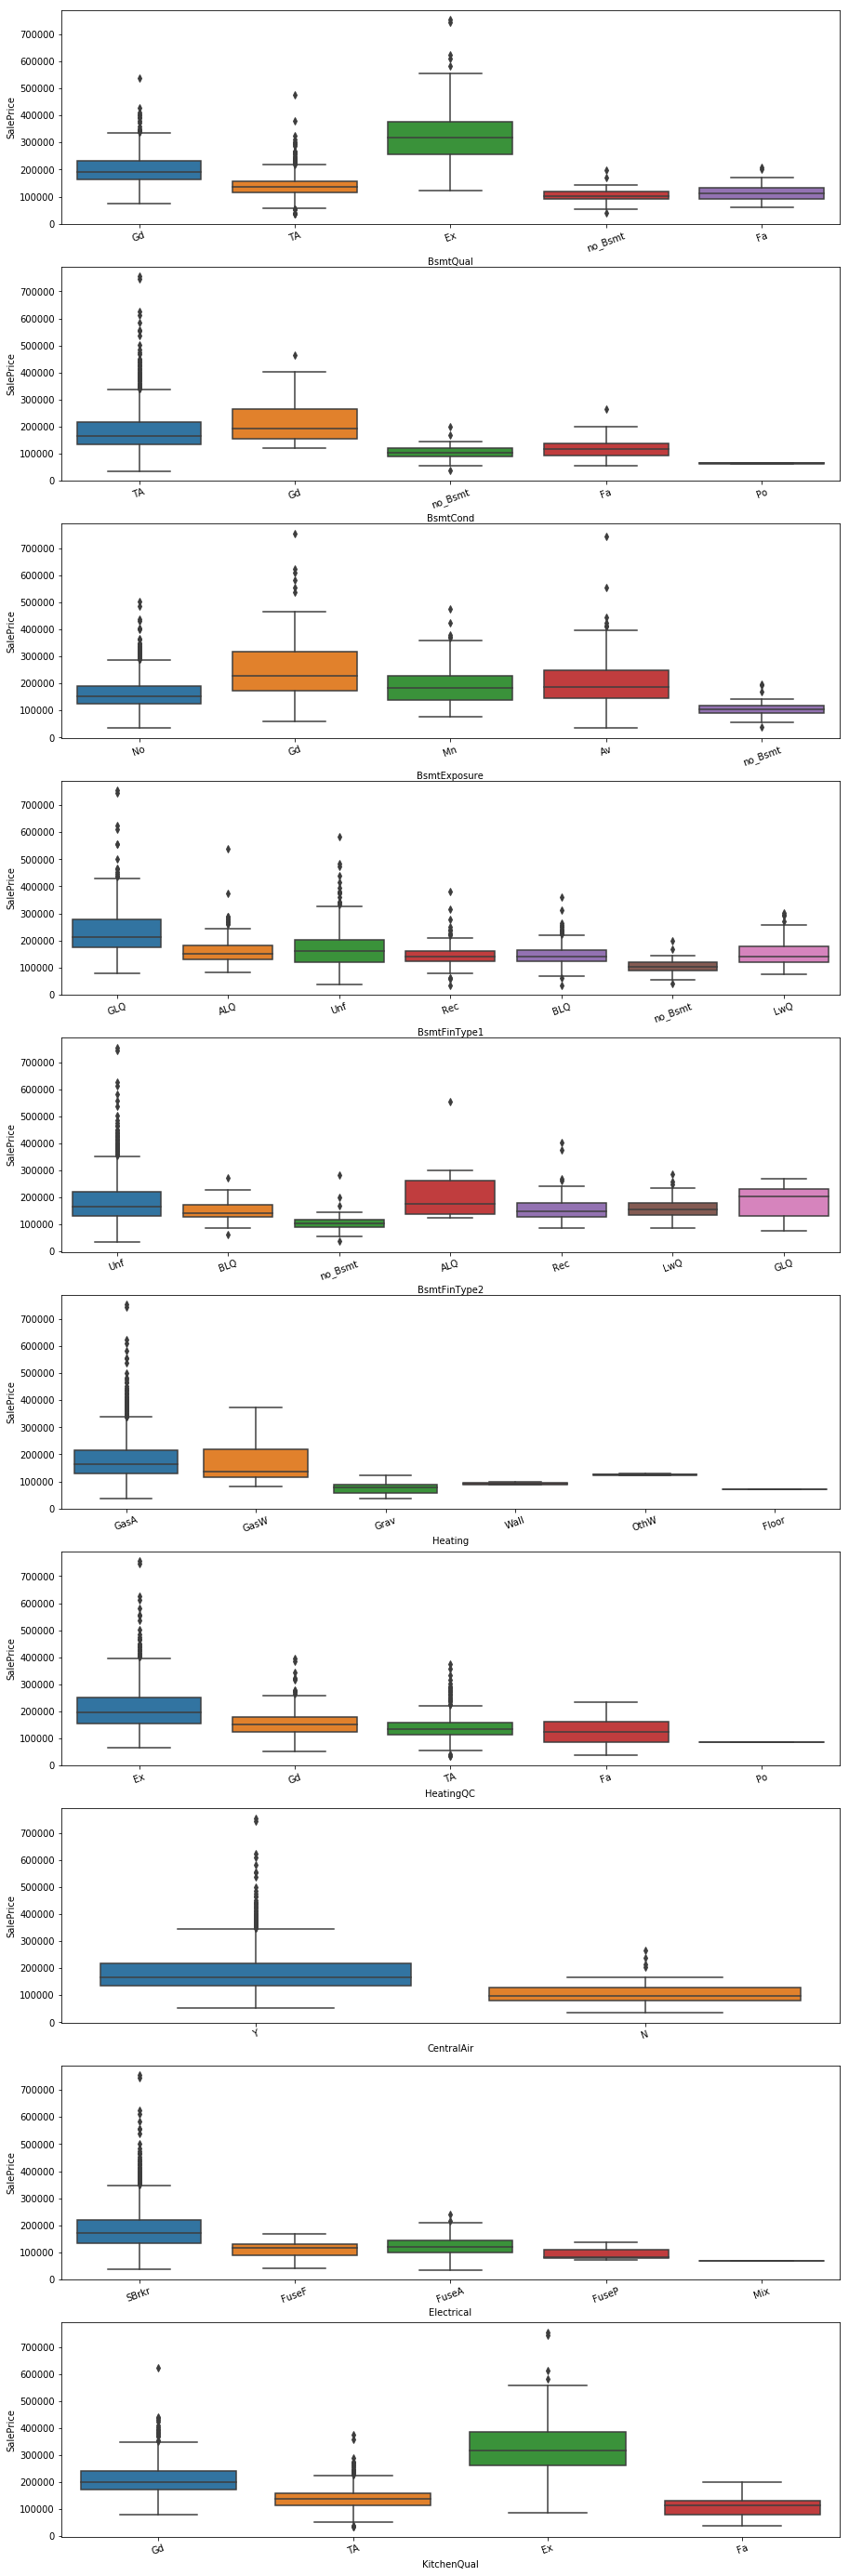

In [1158]:
feat3=feat2[20:30]
fig = plt.figure(figsize=(15,50),edgecolor='red')
pos=0
for col in feat3:
    pos=pos+1
    ax1=fig.add_subplot(10,1,pos,projection=None)
    sns.boxplot(data[col],data['SalePrice'],ax=ax1)
    plt.xlabel(col)
    plt.xticks(rotation=20)

In [1159]:
#give weightage as ex as 4,gd as 3,TA as 2,Fa as 1 and 0 for none in BsmtQual, BsmtCond,bsmnt_exposure

In [1160]:
def labelbq(str):
    if str=='Ex':
        return 4
    elif str=='Gd':
        return 3
    elif str=='TA':
        return 2
    elif str=='Fa':
        return 1
    else:
        return 0
data["BsmtQual"]=data["BsmtQual"].apply(labelbq)   
test["BsmtQual"]=test["BsmtQual"].apply(labelbq)   


In [1161]:
data["BsmtCond"]=data["BsmtCond"].apply(labelbq)    
test["BsmtCond"]=test["BsmtCond"].apply(labelbq)    

In [1162]:
data['BsmtExposure'].value_counts()

No         953
Av         221
Gd         134
Mn         114
no_Bsmt     38
Name: BsmtExposure, dtype: int64

In [1163]:
data[ 'BsmtFinType1'].value_counts()

Unf        430
GLQ        418
ALQ        220
BLQ        148
Rec        133
LwQ         74
no_Bsmt     37
Name: BsmtFinType1, dtype: int64

In [1164]:
list_for_dummies=list_for_dummies+["BsmtFinType1",'BsmtExposure']

In [1165]:
print(data[ 'BsmtFinType2'].value_counts())
del data['BsmtFinType2']
del test['BsmtFinType2']

Unf        1256
Rec          54
LwQ          46
no_Bsmt      38
BLQ          33
ALQ          19
GLQ          14
Name: BsmtFinType2, dtype: int64


In [1166]:
#get rid of this

print(data.Heating.value_counts())
del data['Heating']
del test['Heating']

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


In [1167]:
#though we got rid of Heating we can utilize its Quality therefore weightage can be given
data.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [1168]:
data["HeatingQC"]=data["HeatingQC"].apply(labelbq)    
test["HeatingQC"]=test["HeatingQC"].apply(labelbq)    

In [1169]:
# just substitute 0 and 1
data.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [1170]:
def labelca(str):
    if str=='Y':
        return 1
    else:
        return 0
data['CentralAir']=data['CentralAir'].apply(labelca)
test['CentralAir']=test['CentralAir'].apply(labelca)

In [1171]:
#electrical- SBrkr as one category and rest in 'others'
data.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1172]:
def labelec(str):
    if str=='SBrkr':
        return 'SBrkr'
    else:
        return 'others'
data['Electrical']=data['Electrical'].apply(labelec)
test['Electrical']=test['Electrical'].apply(labelec)

In [1173]:
list_for_dummies=list_for_dummies+["Electrical"]

In [1174]:
#weightage
data.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [1175]:
data['KitchenQual']=data['KitchenQual'].apply(labelbq)
test['KitchenQual']=test['KitchenQual'].apply(labelbq)

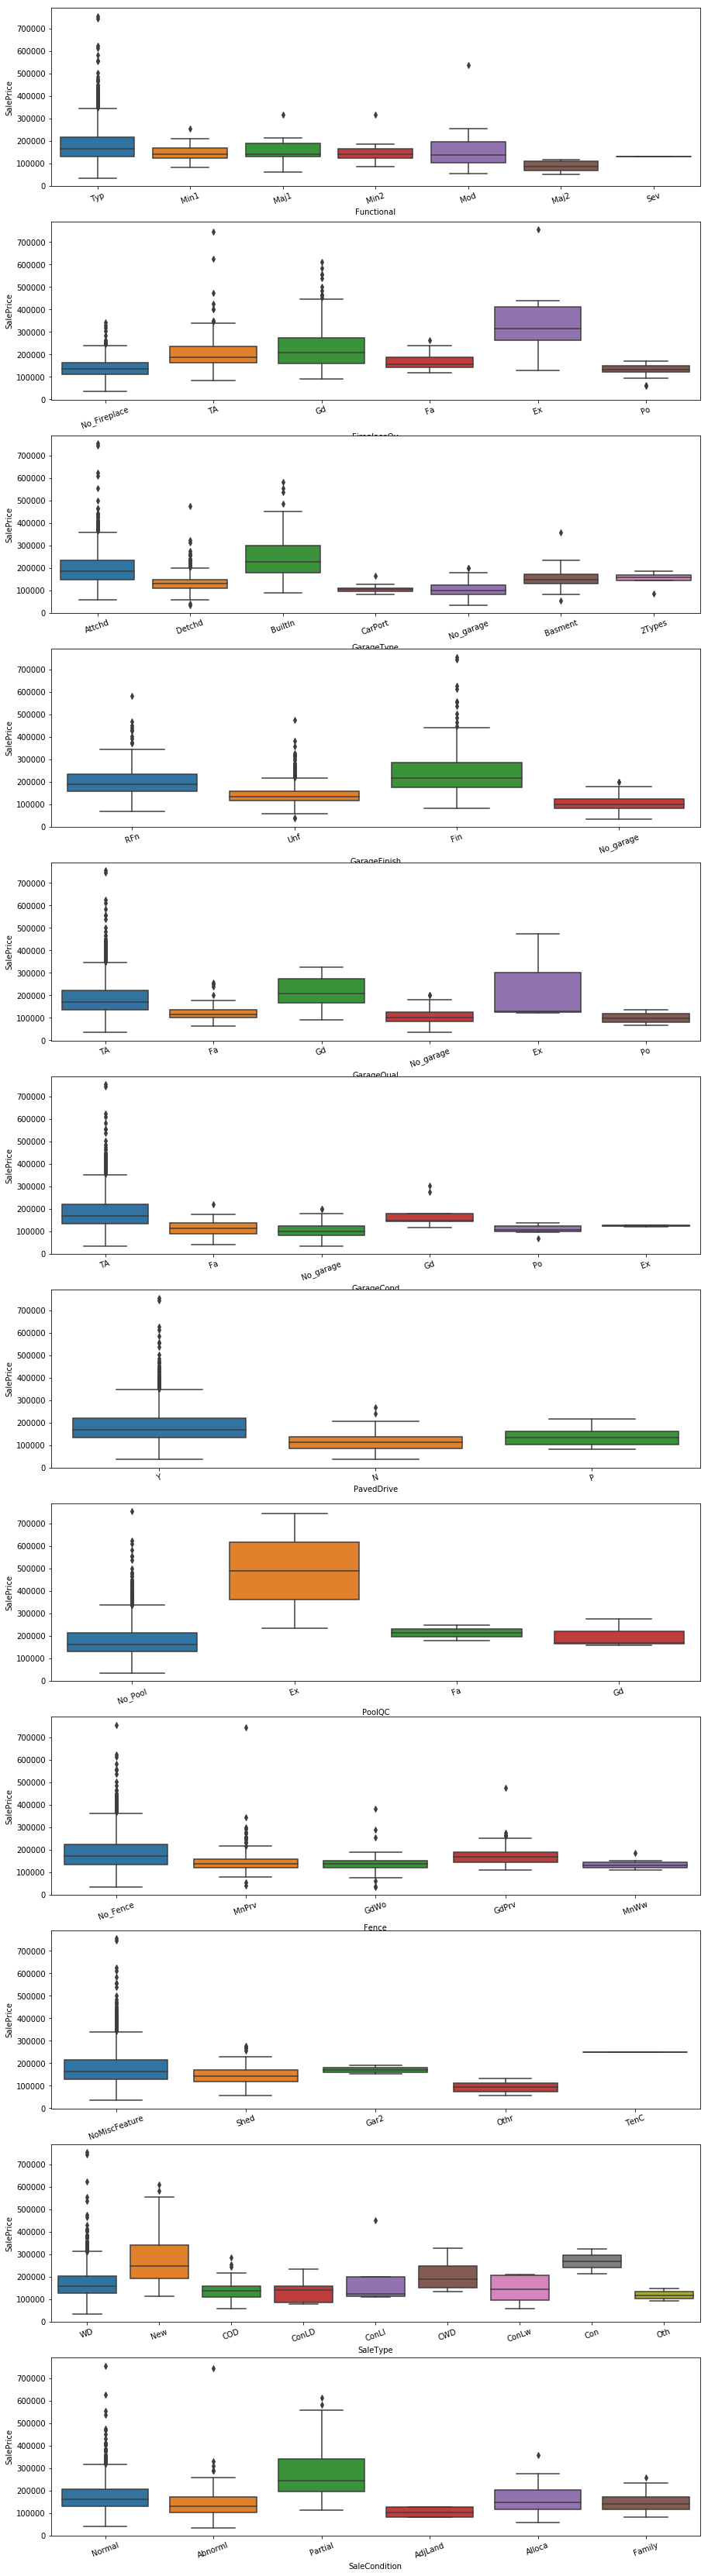

In [1176]:
feat3=feat2[30:42]
fig = plt.figure(figsize=(15,60),edgecolor='red')
pos=0
for col in feat3:
    pos=pos+1
    ax1=fig.add_subplot(12,1,pos,projection=None)
    sns.boxplot(data[col],data['SalePrice'],ax=ax1)
    plt.xlabel(col)
    plt.xticks(rotation=20)

In [1177]:
#join Maj1,Maj2 and Sev as others
data['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [1178]:
data['Functional'].replace(['Mod','Maj1','Maj2','Sev'],'others',inplace=True)
test['Functional'].replace(['Mod','Maj1','Maj2','Sev'],'others',inplace=True)


In [1179]:
list_for_dummies=list_for_dummies+["Functional"]

In [1180]:
# weightage 0 to 5
data['FireplaceQu'].value_counts()

No_Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [1181]:
data['FireplaceQu']=data['FireplaceQu'].apply(labelbq)
test['FireplaceQu']=test['FireplaceQu'].apply(labelbq)

In [1182]:
#2Type and basement as one
data['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No_garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [1183]:
list_for_dummies=list_for_dummies+["GarageType"]

In [1184]:
#can be useful
data['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
No_garage     81
Name: GarageFinish, dtype: int64

In [1185]:
list_for_dummies=list_for_dummies+["GarageFinish"]

In [1186]:
#weightage
data['GarageQual'].value_counts()

TA           1311
No_garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64

In [1187]:
data['GarageQual']=data['GarageQual'].apply(labelbq)
test['GarageQual']=test['GarageQual'].apply(labelbq)

In [1188]:
#weightage
data['GarageCond'].value_counts()

TA           1326
No_garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [1189]:
data['GarageCond']=data['GarageCond'].apply(labelbq)
test['GarageCond']=test['GarageCond'].apply(labelbq)

In [1190]:
# can give 2 to Y,1 to P and 0 to N
data['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [1191]:
def labelpd(str):
    if str=='Y':
        return 2
    elif str=='P':
        return 1
    else:
        return 0
data['PavedDrive']=data['PavedDrive'].apply(labelpd)
test['PavedDrive']=test['PavedDrive'].apply(labelpd)

In [1192]:
#get rid of this
data['PoolQC'].value_counts()

No_Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [1193]:
del data['PoolQC']
del test['PoolQC']


In [1194]:
#since according to the plot theres no significant effect on the saleprice and maximum is no fence so get rid of this

data['Fence'].value_counts()

No_Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [1195]:
del data['Fence']
del test['Fence']

In [1196]:
#theres no relevant reason like elevator etc to keep this feature
data['MiscFeature'].value_counts()

NoMiscFeature    1406
Shed               49
Gar2                2
Othr                2
TenC                1
Name: MiscFeature, dtype: int64

In [1197]:
del data['MiscFeature']
del test['MiscFeature']

In [1198]:
#we can keep this as this is the extra amount encurred due to addition of misclenous features
data['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [1199]:
#not that informative
data['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [1200]:
del data['SaleType']
del test['SaleType']

In [1201]:
#it can effect as if the sale is between the family members the the sale price can be lesser than otherwise
data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [1202]:
list_for_dummies=list_for_dummies+["SaleCondition",'MSSubClass']

In [1203]:
print(len(list_for_dummies))
list_for_dummies

17


['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Foundation',
 'BsmtFinType1',
 'BsmtExposure',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'SaleCondition',
 'MSSubClass']

In [1204]:
left=data.columns[data.dtypes==object]

In [1205]:
print(left.shape)
left

(16,)


Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'SaleCondition'],
      dtype='object')

In [1206]:
data_without_dummies=data.copy(deep=True)

In [1207]:
data=pd.get_dummies(data, columns = list_for_dummies )
test=pd.get_dummies(test, columns = list_for_dummies )

In [1208]:
data.columns

Index(['LotFrontage', 'LotArea', 'Alley', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190'],
      dtype='object', length=154)

In [1209]:
test.columns

Index(['LotFrontage', 'LotArea', 'Alley', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_150', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190'],
      dtype='object', length=154)

In [1210]:
del data['BsmtFinType1_no_Bsmt']
del data['MoSold']
del test['BsmtFinType1_no_Bsmt']
del test['MoSold']

In [1211]:
data['TotalSF'] = data_without_dummies['TotalBsmtSF'] + data_without_dummies['1stFlrSF'] + data_without_dummies['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

In [1395]:
test1=test.copy(deep=True)

# XGboost 
we will predict in 4 different ways:
#1 we will use only our important features found out by filtering the features by seeing the corelations to predict and will check our log rmse through cross validation
#2 we will use pca on whole of our dataframe and then predict using XGboost and compare the accuracy

#3 finally we will use ensamble to avoid overfitting using different models

In [1496]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [1497]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [1558]:
test=test1.copy(deep=True)

In [1559]:
X=data.copy(deep=True)
Y=data['SalePrice']

In [1560]:
del X['SalePrice']

#  1 Using important features found from data analysis

In [1561]:
X_imp=data[best_corelated_features]

In [1562]:
a=list(X_imp.columns)+['Fireplaces']

In [1563]:
X_imp['TotalSF']=X['TotalSF']

C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1564]:
X_imp.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'TotalSF'],
      dtype='object')

In [1565]:
X_imp.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,TotalSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,2567.048630
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,821.714421
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,334.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,2009.500000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,2474.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,3004.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,11752.000000


In [1566]:
X_imp['Fireplaces']=data_without_dummies['Fireplaces']
#X_imp['ExterCond']=data_without_dummies['ExterCond']
#X_imp['FireplaceQu']=data_without_dummies['FireplaceQu']


C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1567]:
len(X_imp.columns)

12

In [1568]:
#making feature interaction of the important features as they will prove to be more informative.
for i in a:
    j=i
    for j in a:
         X_imp[i+j]=X_imp[i]*X_imp[j]
         

C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [1569]:
#using these features coz from our outlier analysis there was a specific trend in these features that hike the saleprice
X_imp['MSSubClass']=data_without_dummies['MSSubClass']
X_imp['MSZoning']=data_without_dummies['MSZoning']
X_imp['PoolArea']=data_without_dummies['PoolArea']

C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [1570]:
X_imp=pd.get_dummies(X_imp, columns =['MSSubClass','MSZoning','PoolArea'])

In [1571]:
X_imp.shape

(1460, 161)

In [1572]:
#making feature interaction of important features in the main dataset(hopefully will give better results)
for i in best_corelated_features:
    j=i
    for j in best_corelated_features:
        
        X[i+j]=X[i]*X[j]
        test[i+j]=test[i]*test[j]
        

In [1573]:
X.shape

(1460, 252)

In [1574]:
X_copy=X.copy(deep=True)

In [1575]:
test.shape

(1459, 252)

In [1576]:
X.columns

Index(['LotFrontage', 'LotArea', 'Alley', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'YearRemodAddOverallQual', 'YearRemodAddGrLivArea',
       'YearRemodAddGarageCars', 'YearRemodAddGarageArea',
       'YearRemodAddTotalBsmtSF', 'YearRemodAdd1stFlrSF',
       'YearRemodAddFullBath', 'YearRemodAddTotRmsAbvGrd',
       'YearRemodAddYearBuilt', 'YearRemodAddYearRemodAdd'],
      dtype='object', length=252)

In [1577]:
# Alley reduced the score
#X_imp['Alley']=data_without_dummies['Alley']
# MiscVal reduced the score
#X_imp['MiscVal']=data_without_dummies['MiscVal']

In [1676]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)
X_imp_train,X_imp_test,Y_imp_train, Y_imp_test = train_test_split(X_imp, Y, test_size=0.2, random_state=123)

In [1579]:
X_train=scaler.fit_transform(X_train1)
X_test=scaler.transform(X_test1)
X_imp_train=scaler.fit_transform(X_imp_train)
X_imp_test=scaler.transform(X_imp_test)


C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nikitasha

In [1580]:
xg=xgb.XGBRegressor(booster='gbtree',objective='reg:linear',max_depth=4,learning_rate=0.1111,n_estimator=10,colsample_bytree=.3,alpha=10,
                    gamma=0.5,subsample=.9)

In [1581]:
xg.fit(X_imp_train,Y_imp_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.5, learning_rate=0.1111,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimator=10, n_estimators=100, n_jobs=1, nthread=None,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.9)

In [1582]:
xg.score(X_imp_test,Y_imp_test)

0.893002268833902

In [1583]:
Y_imp_preds=xg.predict(X_imp_test)

In [1584]:
(Y_imp_preds-Y_imp_test).mean()

-1052.9787965539383

In [1585]:
rmse = np.sqrt(mean_squared_error(np.log(Y_imp_test), np.log(Y_imp_preds)))
print(rmse)
#this metric is used in the actual problem evaluation

0.1252037724323932


In [1586]:
np.sqrt(mean_squared_error(Y_imp_test, Y_imp_preds))

25713.902521566175

In [1587]:
residual_all=Y_imp_test-Y_imp_preds

Text(0, 0.5, 'residual')

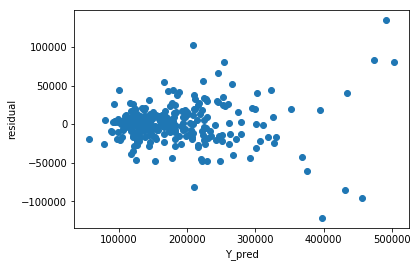

In [1588]:
plt.scatter(Y_imp_preds,residual_all)
plt.xlabel("Y_pred")
plt.ylabel("residual")

In [1589]:
print(Y_imp_test.mean())

181737.70205479453


# As there is a very high chance of overfitting using one time test_train split so use Cross validation(also for improved performance use grid search)

In [1590]:
#this is the metric we want our cv to evaluate on so we can introduce this function in 'feval' parameter
def log_rmse(preds, dmatrix):
    y=dmatrix.get_label()
    rmse = np.sqrt(mean_squared_error(np.log(y), np.log(preds)))

    return 'log_rmse', rmse

In [1591]:
dmatrix1=xgb.DMatrix(X_imp,Y)

In [1592]:
parameters = {
        
        'gamma': [0.5, 1, 1.5, 2],
        'subsample': [0.6,0.4],
        'colsample_bytree': [0.3,0.4],
        'max_depth': [3, 4, 5],
         'learning_rate': [0.1,0.1111,0.3],
          'alpha':[10,15]
        }

In [1768]:
params={'objective':'reg:linear','max_depth':4,'learning_rate':0.1111,'n_estimator':100,'colsample_bytree':.3,'alpha':10,
                    'gamma':0.5}

In [1769]:
cv_results=xgb.cv(params=params,dtrain=dmatrix1,num_boost_round=200,early_stopping_rounds=20,nfold=4,feval=log_rmse, 
                  as_pandas=True, seed=123,
                  verbose_eval=10,shuffle=True)

[17:32:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:32:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:32:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17:32:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-log_rmse:2.20207+0.000324575	train-rmse:176620+589.454	test-log_rmse:2.20742+0.00950532	test-rmse:176943+1782.64
[17:32:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:32:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes,

[17:32:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:32:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:32:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[30]	train-log_rmse:0.110528+0.00199747	train-rmse:18855.7+306.249	test-log_rmse:0.154109+0.00985657	test-rmse:33711.7+4728.89
[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra no

[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:32:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:32:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[17:32:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:32:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:32:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17:32:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17:32:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[17:32:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:32:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:32:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:32:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:32:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:32:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:32:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [1770]:
cv_results.tail()

,train-log_rmse-mean,train-log_rmse-std,train-rmse-mean,train-rmse-std,test-log_rmse-mean,test-log_rmse-std,test-rmse-mean,test-rmse-std
82,0.086414,0.001882,13289.352051,320.707728,0.150452,0.011348,33151.990722,4931.287639
83,0.086197,0.001815,13228.316162,294.743255,0.150541,0.011255,33168.085449,4916.998862
84,0.085778,0.001800,13138.416748,305.592883,0.150465,0.011197,33156.586914,4910.118054
85,0.085516,0.001761,13087.943848,297.207935,0.150367,0.011225,33149.479004,4911.594035
86,0.085171,0.001672,13009.685791,316.849936,0.150359,0.011216,33144.033203,4885.345758


here we got test_log_rmse: 0.151451

# 2) Using whole data 
I tried PCA but it increased the error therefore lets just try Whole dataset+feature interactions of X_imp we found above

In [1657]:
X.shape

(1460, 252)

In [1658]:
X_train.shape

(1168, 252)

In [1659]:
test=test[X.columns]

In [1660]:
test.shape

(1459, 252)

In [1661]:
xg=xgb.XGBRegressor(booster='gbtree',objective='reg:linear',max_depth=4,learning_rate=0.1111,n_estimator=10,colsample_bytree=.3,alpha=10,
                    gamma=0.5)

In [1662]:
xg.fit(X_train,Y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.5, learning_rate=0.1111,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimator=10, n_estimators=100, n_jobs=1, nthread=None,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=1)

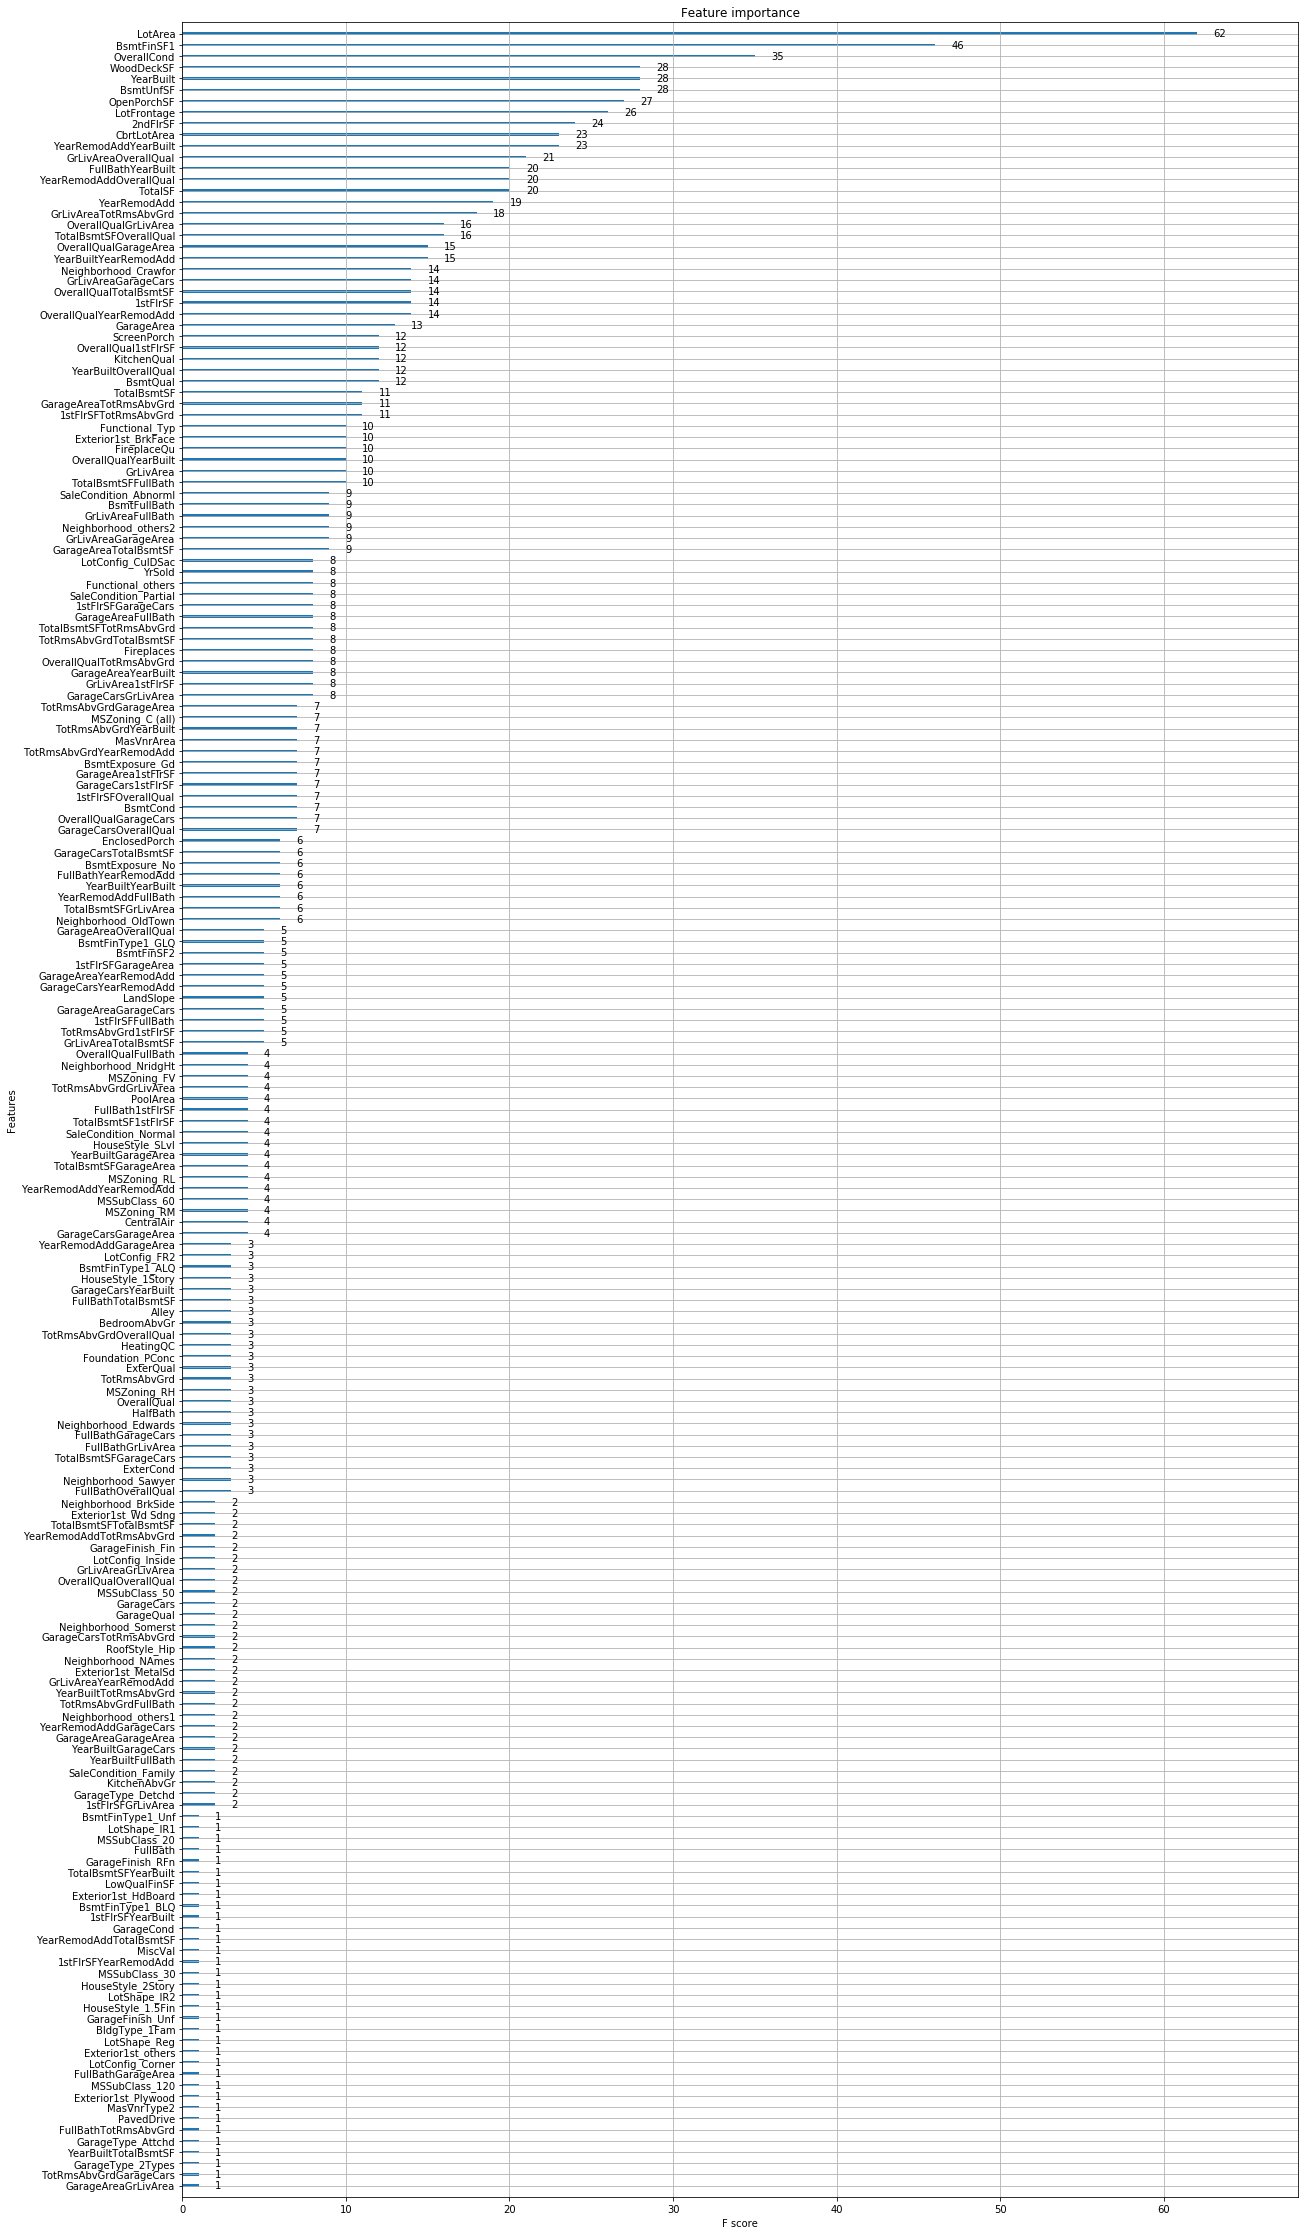

In [1663]:
from xgboost import plot_importance
xg.feature_importances_
fig = plt.figure(figsize=(20,40),edgecolor='red')
ax1=fig.add_subplot(1,1,1,projection=None)
plot_importance(xg,ax=ax1)

In [1664]:
d={}
col_list=[]
for i in dic.keys():
    if dic[i]>0.001:
       
        d[i]=dic[i]
import operator
d=sorted(d.items(),key=operator.itemgetter(1),reverse=True)

In [1703]:
col_list=[]
imp=[]
for i in range(len(d)):
    col_list=col_list+[d[i][0]]
    imp=imp+[d[i][1]]

In [1704]:
len(col_list)

158

In [1721]:
X_train1=X_train[col_list[:105]]

In [1722]:
X_test1=X_test[col_list[:105]]

In [1723]:
xg.fit(X_train1,Y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.5, learning_rate=0.1111,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimator=10, n_estimators=100, n_jobs=1, nthread=None,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=1)

In [1724]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(1168, 252)
(292, 252)
(1168,)


In [1725]:
Y_preds=xg.predict(X_test1)

In [1726]:
rmse = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_preds)))
print(rmse)
#this metric is used in the actual problem evaluation

0.1055801575793872


In [1773]:
dmatrix2=xgb.DMatrix(X_train,Y_train)
cv_results1=xgb.cv(params=params,dtrain=dmatrix2,num_boost_round=200,early_stopping_rounds=10,nfold=4,feval=log_rmse, 
                  as_pandas=True, seed=123,
                  verbose_eval=10,shuffle=True)

[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-log_rmse:2.20377+0.0013592	train-rmse:176554+1960.41	test-log_rmse:2.19929+0.00498901	test-rmse:176581+6158.5
[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 

[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:33:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[17:33:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:33:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:33:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:33:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17:33:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:33:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[17:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[17:33:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[70]	train-log_rmse:0.0698592+0.00324829	train-rmse:10143.9+304.528	test-log_rmse:0.140889+0.00724553	test-rmse:28842.2+5863.3
[17:33:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:33:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:33:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra no

[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:33:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[17:33:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:33:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:33:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:33:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:33:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:33:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[17:33:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[17:33:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:33:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[17:33:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17:33:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:33:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:33:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[17:33:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[17:33:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [1774]:
cv_results1.tail()

,train-log_rmse-mean,train-log_rmse-std,train-rmse-mean,train-rmse-std,test-log_rmse-mean,test-log_rmse-std,test-rmse-mean,test-rmse-std
145,0.045497,0.002427,6572.732788,262.980676,0.138199,0.007203,28466.778809,5837.930550
146,0.045252,0.002433,6537.142334,259.806005,0.138162,0.007241,28464.458985,5843.007146
147,0.045009,0.002451,6504.888306,263.977942,0.138129,0.007227,28460.832519,5838.620693
148,0.044805,0.002415,6469.736694,256.876927,0.138095,0.007264,28458.529297,5839.113542
149,0.044558,0.002383,6433.799439,252.905027,0.138009,0.007291,28448.295899,5841.129090


## Improvement in log rmse
to 0.139

# Will use Xgboost to find the most important features


In [794]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [795]:
xg=xgb.XGBRegressor(booster='gbtree',objective='reg:linear',max_depth=4,learning_rate=0.1111,n_estimator=10,colsample_bytree=.3,alpha=10,
                    gamma=0.5)
xg.fit(X_train,Y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.5, learning_rate=0.1111,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimator=10, n_estimators=100, n_jobs=1, nthread=None,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=1)

In [518]:
#plotting all of the features of X according to the feature importance

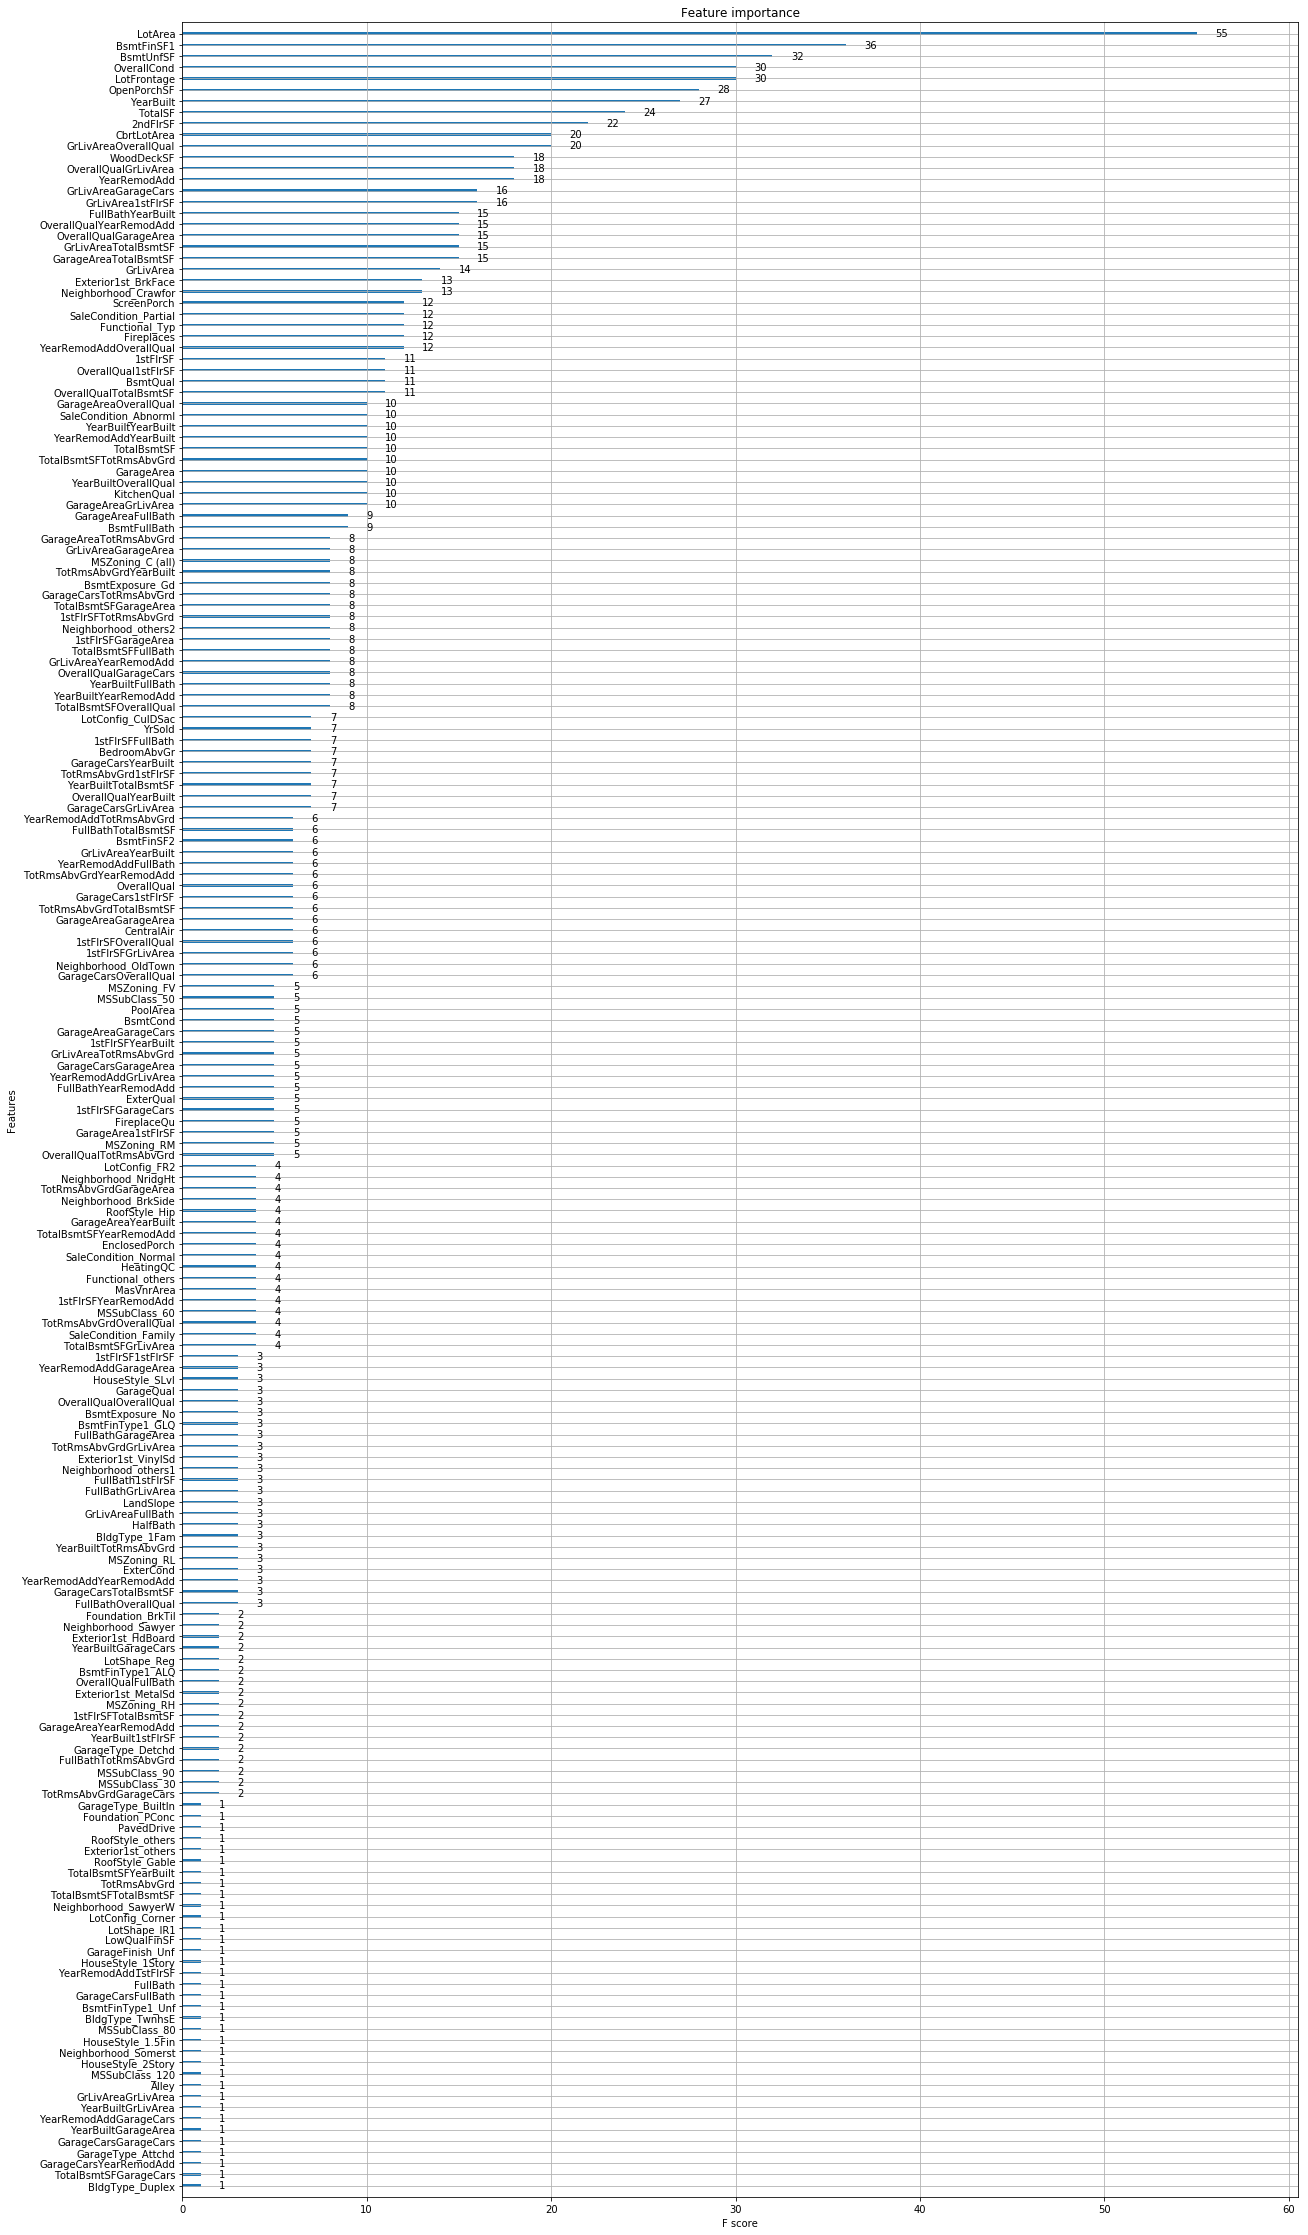

In [796]:
from xgboost import plot_importance
xg.feature_importances_
fig = plt.figure(figsize=(20,40),edgecolor='red')
ax1=fig.add_subplot(1,1,1,projection=None)
plot_importance(xg,ax=ax1)

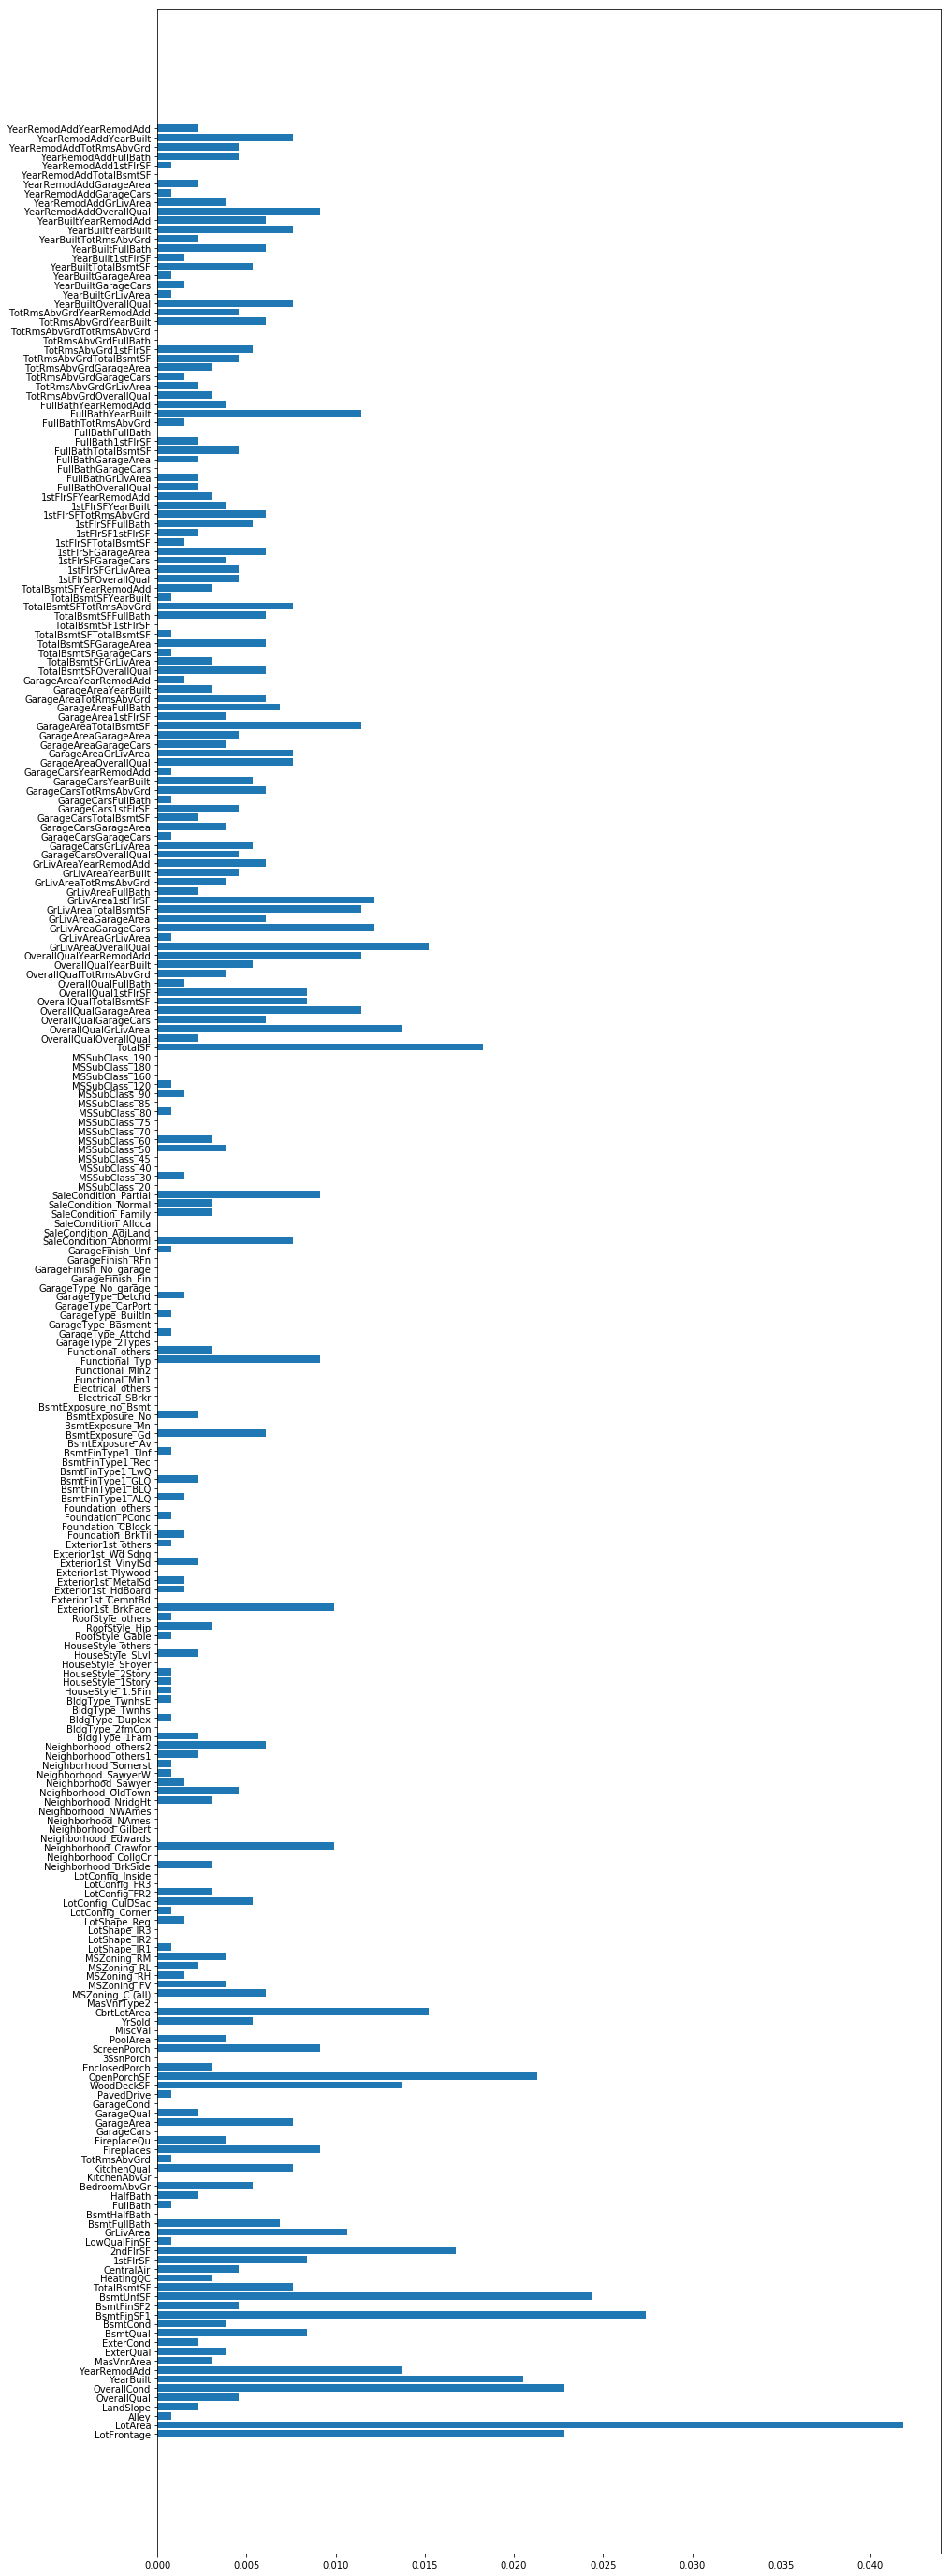

In [797]:
fig = plt.figure(figsize=(15,50),edgecolor='red')
plt.barh(range(len(xg.feature_importances_)), xg.feature_importances_)
plt.yticks(ticks=np.arange(len(X.columns)),labels=X.columns)
plt.show()

In [798]:
fimp=list(xg.feature_importances_)
features=list(X.columns)
dic=dict(zip(features,fimp))

In [799]:
#extracting top 40 features
d={}
col_list=[]
for i in dic.keys():
    if dic[i]>0.001:
       
        d[i]=dic[i]
import operator
d=sorted(d.items(),key=operator.itemgetter(1),reverse=True)

In [801]:
d[:5]

[('LotArea', 0.041856926),
 ('BsmtFinSF1', 0.02739726),
 ('BsmtUnfSF', 0.02435312),
 ('LotFrontage', 0.02283105),
 ('OverallCond', 0.02283105)]

In [802]:
col_list=[]
imp=[]
for i in range(len(d)):
    col_list=col_list+[d[i][0]]
    imp=imp+[d[i][1]]

In [803]:
col_list=col_list[:54]

In [805]:
X_xgboost_important=X[col_list]
test_xgboost_important=test[col_list]

In [806]:
X_xgboost_important.shape

(1460, 54)

In [1280]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_xgboost_important, Y, test_size=0.2, random_state=123)

In [1282]:
dmatrix3=xgb.DMatrix(X_train,Y_train)
cv_results1=xgb.cv(params=params,dtrain=dmatrix3,num_boost_round=200,early_stopping_rounds=10,nfold=4,feval=log_rmse, 
                  as_pandas=True, seed=123,
                  verbose_eval=10,shuffle=True)

[15:36:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-log_rmse:2.20389+0.000139128	train-rmse:176618+1968.33	test-log_rmse:2.20335+0.0220376	test-rmse:176614+6472.33
[15:36:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 

[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:36:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[15:36:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[15:36:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[15:36:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[15:36:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[15:36:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[15:36:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[15:36:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15:36:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [ ]:
cv_results1.tail()

## Improvement
only using top 45 important features reduced our error to 0.130
54 features gave-0.128395	
## lets try feature interactions of only top 10 features with the dataset having only important features


In [837]:
X_xgboost_important=X[col_list]
test_xgboost_important=test[col_list]

In [838]:
X_xgboost_important.shape

(1460, 54)

In [839]:
col_list2=col_list[:12]

In [840]:
for i in col_list2:
    j=i
    for j in col_list2:
        X_xgboost_important[i+j]=X_xgboost_important[i]*X_xgboost_important[j]
        test_xgboost_important[i+j]=test_xgboost_important[i]*test_xgboost_important[j]

C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [841]:
X_xgboost_important.shape

(1460, 196)

In [842]:
test_xgboost_important.shape

(1459, 196)

In [843]:
X_xgboost_important.columns

Index(['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'LotFrontage', 'OverallCond',
       'OpenPorchSF', 'YearBuilt', 'TotalSF', '2ndFlrSF', 'CbrtLotArea',
       ...
       'YearRemodAddBsmtFinSF1', 'YearRemodAddBsmtUnfSF',
       'YearRemodAddLotFrontage', 'YearRemodAddOverallCond',
       'YearRemodAddOpenPorchSF', 'YearRemodAddTotalSF',
       'YearRemodAdd2ndFlrSF', 'YearRemodAddCbrtLotArea',
       'YearRemodAddGrLivAreaOverallQual', 'YearRemodAddYearRemodAdd'],
      dtype='object', length=196)

In [844]:
Y=data['SalePrice']

In [845]:
dmatrix3=xgb.DMatrix(X_xgboost_important,Y)
cv_results1=xgb.cv(params=params,dtrain=dmatrix3,num_boost_round=200,early_stopping_rounds=10,nfold=4,feval=log_rmse, 
                  as_pandas=True, seed=123,
                  verbose_eval=10,shuffle=True)

[13:49:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13:49:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13:49:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13:49:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-log_rmse:2.20282+0.000994051	train-rmse:176653+579.967	test-log_rmse:2.20898+0.00753147	test-rmse:176928+1821.92
[13:49:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[13:49:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes,

[13:49:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13:49:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13:49:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13:49:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13:49:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[13:49:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13:49:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:49:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[13:49:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13:49:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[13:49:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13:49:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13:49:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13:49:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:49:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[13:49:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[13:49:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13:49:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13:49:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13:49:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13:49:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:49:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13:49:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[13:49:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13:49:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[13:49:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13:49:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[13:49:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:49:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[13:49:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[13:49:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13:49:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13:49:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[13:49:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13:49:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:49:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[13:49:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13:49:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13:49:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[13:49:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13:49:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13:49:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [846]:
cv_results1.tail()

,train-log_rmse-mean,train-log_rmse-std,train-rmse-mean,train-rmse-std,test-log_rmse-mean,test-log_rmse-std,test-rmse-mean,test-rmse-std
107,0.058965,0.002019,8457.985839,347.877876,0.128347,0.010070,27094.166504,4024.348061
108,0.058673,0.002175,8417.855102,361.222603,0.128499,0.010169,27097.530274,4026.012700
109,0.058375,0.002152,8371.963501,356.210676,0.128528,0.010159,27098.694824,4023.564044
110,0.058110,0.002151,8329.745972,359.547090,0.128502,0.010156,27103.333008,4025.480581
111,0.057882,0.002264,8296.378540,364.992397,0.128445,0.010116,27093.698731,4026.500331


## We shall try adding the feature interaction of 10 important features in the complete dataset

In [920]:
rmse = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Ypred11)))
print(rmse)

0.11317119067659127


In [871]:
test.shape

(1459, 252)

In [885]:
Y_final=xg.predict(test)

In [886]:
Y_final=pd.DataFrame(Y_final,columns=['SalePrice'])

In [891]:
Y_final.shape[0]+1461

2920

In [893]:
Y_final['Id']=np.arange(1461,2920)
Y_final=Y_final[['Id','SalePrice']]
Y_final.to_csv('Y_final',sep=',',index=False)